Import libraries

In [11]:
import pandas as pd
from autots import AutoTS
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys
from pathlib import Path

parent_dir = Path.cwd().parent.parent

if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))
from shared.metrics import print_evaluation_metrics
from shared.helpers import store_model
from shared.helpers import store_predictions_and_create_graph

Load dataset

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date"
target_column = "Close"
df = pd.read_csv(file_path, parse_dates=True)
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")


df.set_index(date_column, inplace=True)
dates = df.index.values
dates

array(['2014-10-17T00:00:00.000000000', '2014-10-18T00:00:00.000000000',
       '2014-10-19T00:00:00.000000000', ...,
       '2024-01-31T00:00:00.000000000', '2024-02-01T00:00:00.000000000',
       '2024-02-02T00:00:00.000000000'], dtype='datetime64[ns]')

Create model

In [3]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


Train test split, fit and prediction

In [4]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Train model

In [6]:
model.fit(train)

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49498D+01    |proj g|=  1.23098D+02


 This problem is unconstrained.



At iterate    1    f=  8.51946D+00    |proj g|=  5.84297D-01

At iterate    2    f=  8.43120D+00    |proj g|=  4.32544D-01

At iterate    3    f=  8.29846D+00    |proj g|=  3.10300D-01

At iterate    4    f=  8.25300D+00    |proj g|=  2.85085D-01

At iterate    5    f=  8.12668D+00    |proj g|=  1.97501D-01

At iterate    6    f=  8.09463D+00    |proj g|=  2.27161D-01

At iterate    7    f=  8.07782D+00    |proj g|=  9.96147D-02

At iterate    8    f=  8.07046D+00    |proj g|=  7.48706D-02

At iterate    9    f=  8.05701D+00    |proj g|=  3.21497D-02

At iterate   10    f=  8.05281D+00    |proj g|=  1.87694D-02

At iterate   11    f=  8.04949D+00    |proj g|=  1.38105D-02

At iterate   12    f=  8.04868D+00    |proj g|=  2.40822D-02

At iterate   13    f=  8.04808D+00    |proj g|=  7.29073D-03

At iterate   14    f=  8.04790D+00    |proj g|=  5.94006D-03

At iterate   15    f=  8.04749D+00    |proj g|=  8.88803D-03

At iterate   16    f=  8.04676D+00    |proj g|=  9.66252D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02308D+00    |proj g|=  2.94727D-02

At iterate    1    f=  8.02251D+00    |proj g|=  1.16843D-02

At iterate    2    f=  8.02242D+00    |proj g|=  5.81489D-03

At iterate    3    f=  8.02240D+00    |proj g|=  2.01625D-03

At iterate    4    f=  8.02240D+00    |proj g|=  1.62477D-03

At iterate    5    f=  8.02239D+00    |proj g|=  1.59316D-03

At iterate    6    f=  8.02238D+00    |proj g|=  1.81249D-03

At iterate    7    f=  8.02236D+00    |proj g|=  3.40604D-03

At iterate    8    f=  8.02231D+00    |proj g|=  5.05705D-03

At iterate    9    f=  8.02225D+00    |proj g|=  6.08841D-03

At iterate   10    f=  8.02218D+00    |proj g|=  3.40079D-03

At iterate   11    f=  8.02214D+00    |proj g|=  1.75929D-03

At iterate   12    f=  8.02213D+00    |proj g|=  1.78172D-03

At iterate   13    f=  8.0

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 5


2024-04-01 15:36:22.708814: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-01 15:36:22.747887: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 15:36:22.747921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 15:36:22.749641: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-01 15:36:22.757239: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50
85/85 [==============================] - 4s 2ms/step - loss: 0.4231
Epoch 2/50
85/85 [==============================] - 0s 3ms/step - loss: 0.4240
Epoch 3/50
85/85 [==============================] - 0s 3ms/step - loss: 0.4221
Epoch 4/50
85/85 [==============================] - 0s 3ms/step - loss: 0.4229
Epoch 5/50
85/85 [==============================] - 0s 4ms/step - loss: 0.4223
Epoch 6/50
85/85 [==============================] - 0s 4ms/step - loss: 0.4228
Epoch 7/50
85/85 [==============================] - 0s 3ms/step - loss: 0.4226
Epoch 8/50
85/85 [==============================] - 0s 3ms/step - loss: 0.4222
Epoch 9/50
85/85 [==============================] - 0s 3ms/step - loss: 0.4222
Epoch 10/50
85/85 [==============================] - 0s 3ms/step - loss: 0.4224
Epoch 11/50
85/85 [==============================] - 0s 3ms/step - loss: 0.4222
Epoch 12/50
85/85 [==============================] - 0s 4ms/step - loss: 0.4224
Epoch 13/50
85/85 [==============================

/home/samuell/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Model Number: 26 with model FBProphet in generation 0 of 5


15:36:52 - cmdstanpy - INFO - Chain [1] start processing
15:36:52 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 27 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 5
Model Number: 29 with model DatepartRegression in generation 0 of 5
Model Number: 30 with model UnobservedComponents in generation 0 of 5
Model Number: 31 with model UnobservedComponents in generation 0 of 5
Model Number: 32 with model ETS in generation 0 of 5
Model Number: 33 with model ARDL in generation 0 of 5
Model Number: 34 with model UnivariateMotif in generation 0 of 5
Model Number: 35 with model UnivariateMotif in generation 0 of 5
Model Number: 36 with model FBProphet in generation 0 of 5
Model Number: 37 with model SeasonalNaive in generation 0 of 5
Model Number: 38 with model DatepartRegression in generation 0 of 5
Model Number: 39 with model Theta in generation 0 of 5
Model Number: 40 with model UnivariateRegr

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 53 in generation 0: GLM
Model Number: 54 with model GLS in generation 0 of 5
Model Number: 55 with model MetricMotif in generation 0 of 5
Model Number: 56 with model Theta in generation 0 of 5
Model Number: 57 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 57 in generation 0: ARCH
Model Number: 58 with model ConstantNaive in generation 0 of 5
Model Number: 59 with model SeasonalNaive in generation 0 of 5
Model Number: 60 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 60 in generation 0: PreprocessingRegression
Model Number: 61 with model LastValueNaive in generation 0 of 5
Model Number: 62 with model FFT in generation 0 of 5
Template Eval Error: Exception('Transforme

 This problem is unconstrained.
 This problem is unconstrained.


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 107 in generation 0: ARIMA
Model Number: 108 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.31860D+00    |proj g|=  3.00267D-04

At iterate    1    f=  9.31860D+00    |proj g|=  1.02146D-04

At iterate    2    f=  9.31860D+00    |proj g|=  7.14202D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2      4      1     0     0   7.142D-05   9.3

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.30417D+00    |proj g|=  2.96267D-04

At iterate    1    f=  9.30417D+00    |proj g|=  1.00100D-04

At iterate    2    f=  9.30417D+00    |proj g|=  7.24750D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2      4      1     0     0   7.248D-05   9.304D+00
  F =   9.3041679397583081     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 109 with model DatepartRegression in generation 0 of 5
M

/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alp

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'DifferencedTransformer', '1': 'AlignLastValue', '2': 'PctChangeTransformer'}, 'transformation_params': {'0': {}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.2, 'first_value_only': False}, '2': {}}}. fail_on_forecast_nan=True") in model 110 in generation 0: Theta
Model Number: 111 with model GLM in generation 0 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 111 in generation 0: GLM
Model Number: 112 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.10234D+00    |proj g|=  3.82715D-02


 This problem is unconstrained.



At iterate    1    f=  9.10062D+00    |proj g|=  2.01300D-02

At iterate    2    f=  9.09777D+00    |proj g|=  2.29441D-02

At iterate    3    f=  9.09364D+00    |proj g|=  4.65139D-02

At iterate    4    f=  9.08996D+00    |proj g|=  5.74118D-02

At iterate    5    f=  9.08286D+00    |proj g|=  7.90596D-02

At iterate    6    f=  9.07848D+00    |proj g|=  1.03050D-01

At iterate    7    f=  9.07302D+00    |proj g|=  3.22245D-02

At iterate    8    f=  9.07039D+00    |proj g|=  3.29444D-02

At iterate    9    f=  9.06747D+00    |proj g|=  3.24773D-02

At iterate   10    f=  9.06474D+00    |proj g|=  2.54527D-02

At iterate   11    f=  9.06387D+00    |proj g|=  2.27917D-02

At iterate   12    f=  9.06304D+00    |proj g|=  1.03826D-02

At iterate   13    f=  9.06291D+00    |proj g|=  3.83592D-03

At iterate   14    f=  9.06283D+00    |proj g|=  2.94487D-03

At iterate   15    f=  9.06279D+00    |proj g|=  2.57568D-03

At iterate   16    f=  9.06275D+00    |proj g|=  3.66112D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  8.95611D+00    |proj g|=  1.60615D-02

At iterate    2    f=  8.95532D+00    |proj g|=  1.87538D-02

At iterate    3    f=  8.95245D+00    |proj g|=  4.37554D-02

At iterate    4    f=  8.95014D+00    |proj g|=  7.09731D-02

At iterate    5    f=  8.94697D+00    |proj g|=  8.28115D-02

At iterate    6    f=  8.94083D+00    |proj g|=  6.57708D-02

At iterate    7    f=  8.93398D+00    |proj g|=  8.46099D-02

At iterate    8    f=  8.92937D+00    |proj g|=  2.85728D-02

At iterate    9    f=  8.92779D+00    |proj g|=  3.22735D-02

At iterate   10    f=  8.92331D+00    |proj g|=  3.63446D-02

At iterate   11    f=  8.92088D+00    |proj g|=  4.41803D-02

At iterate   12    f=  8.91904D+00    |proj g|=  1.24004D-02

At iterate   13    f=  8.91801D+00    |proj g|=  1.58624D-02

At iterate   14    f=  8.91745D+00    |proj g|=  1.76181D-02

At iterate   15    f=  8.91706D+00    |proj g|=  1.13538D-02

At iterate   16    f=  8.91665D+00    |proj g|=  3.26424D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 119 with model FBProphet in generation 0 of 5
Model Number: 120 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 120 in generation 0: PreprocessingRegression
Model Number: 121 with model GLS in generation 0 of 5
Model Number: 122 with model FFT in generation 0 of 5
Model Number: 123 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 123 in generation 0: ARIMA
Model Number: 124 with model Theta in generation 0 of 5
Model Number: 125 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 125 in generation 0: NeuralProphet
Model Number: 126 with model AverageValueNaive in generation 0 of 5
Model Number: 127 with model KalmanStateSpace in generation 0 of 5
Model Number: 128 with model UnivariateRegression in gen

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104105766802.59248, tolerance: 24252241.70932739
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 143 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 143 in generation 0: UnivariateRegression
Model Number: 144 with model MetricMotif in generation 0 of 5
Model Number: 145 with model SeasonalNaive in generation 0 of 5
Model Number: 146 with model NeuralProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 146 in generation 0: NeuralProphet
Model Number: 147 with model KalmanStateSpace in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 147 in generation 0: KalmanStateSpace
Model Number: 148 with model SeasonalityMotif in generation 0 of 5
Model Number: 149 with model LastValueNaive in generation 0 of 5
Model Number: 150 with model ARDL in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in 

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 156 in generation 0: SeasonalNaive
Model Number: 157 with model UnobservedComponents in generation 0 of 5
New Generation: 1 of 5
Model Number: 158 with model SeasonalNaive in generation 1 of 5
Model Number: 159 with model UnivariateMotif in generation 1 of 5
Model Number: 160 with model Theta in generation 1 of 5
Model Number: 161 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.69514D-01    |proj g|=  6.92385D-03

At iterate    1    f= -3.69515D-01    |proj g|=  1.29279D-04


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f= -3.69515D-01    |proj g|=  1.29279D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     44      2     0     0   1.293D-04  -3.695D-01
  F = -0.36951453057145478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.06853D-01    |proj g|=  5.82370D-03

At iterate    1    f= -2.06853D-01    |proj g|=  1.64045D-04

At iterate    2    f= -2.06853D-01    |proj g|=  1.60641D-04

       

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning

Model Number: 165 with model GLS in generation 1 of 5
Model Number: 166 with model FFT in generation 1 of 5
Model Number: 167 with model Theta in generation 1 of 5
Model Number: 168 with model GLS in generation 1 of 5
Model Number: 169 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 170 with model UnivariateMotif in generation 1 of 5
Model Number: 171 with model Theta in generation 1 of 5
Model Number: 172 with model AverageValueNaive in generation 1 of 5
Model Number: 173 with model UnivariateMotif in generation 1 of 5
Model Number: 174 with model UnobservedComponents in generation 1 of 5
Model Number: 175 with model AverageValueNaive in generation 1 of 5
Model Number: 176 with model SeasonalNaive in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Template Eval Error: Exception('Transformer MaxAbsScaler failed on inverse') in model 176 in generation 1: SeasonalNaive
Model Number: 177 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47481D+00    |proj g|=  9.12958D-01


 This problem is unconstrained.



At iterate    1    f=  8.24992D+00    |proj g|=  3.15042D-01

At iterate    2    f=  8.21545D+00    |proj g|=  2.05401D-01

At iterate    3    f=  8.16124D+00    |proj g|=  1.35821D-01

At iterate    4    f=  8.12980D+00    |proj g|=  1.03735D-01

At iterate    5    f=  8.10656D+00    |proj g|=  9.29103D-02

At iterate    6    f=  8.09801D+00    |proj g|=  5.33441D-02

At iterate    7    f=  8.09545D+00    |proj g|=  6.05259D-02

At iterate    8    f=  8.09401D+00    |proj g|=  1.86774D-02

At iterate    9    f=  8.09318D+00    |proj g|=  1.68512D-02

At iterate   10    f=  8.09166D+00    |proj g|=  2.33445D-02

At iterate   11    f=  8.09009D+00    |proj g|=  1.68484D-02

At iterate   12    f=  8.08877D+00    |proj g|=  1.89483D-02

At iterate   13    f=  8.08806D+00    |proj g|=  3.57891D-02

At iterate   14    f=  8.08725D+00    |proj g|=  2.56863D-02

At iterate   15    f=  8.08665D+00    |proj g|=  3.01943D-02

At iterate   16    f=  8.08588D+00    |proj g|=  3.78847D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.24745D+00    |proj g|=  3.89505D-01

At iterate    2    f=  8.21059D+00    |proj g|=  2.58333D-01

At iterate    3    f=  8.14669D+00    |proj g|=  1.44040D-01

At iterate    4    f=  8.11051D+00    |proj g|=  1.20097D-01

At iterate    5    f=  8.08783D+00    |proj g|=  1.23292D-01

At iterate    6    f=  8.07391D+00    |proj g|=  3.70912D-02

At iterate    7    f=  8.07120D+00    |proj g|=  3.03029D-02

At iterate    8    f=  8.06970D+00    |proj g|=  2.24879D-02

At iterate    9    f=  8.06876D+00    |proj g|=  2.12192D-02

At iterate   10    f=  8.06737D+00    |proj g|=  1.79810D-02

At iterate   11    f=  8.06608D+00    |proj g|=  2.63552D-02

At iterate   12    f=  8.06476D+00    |proj g|=  1.12082D-02

At iterate   13    f=  8.06413D+00    |proj g|=  1.27031D-02

At iterate   14    f=  8.06340D+00    |proj g|=  1.51959D-02

At iterate   15    f=  8.06276D+00    |proj g|=  1.33314D-02

At iterate   16    f=  8.06234D+00    |proj g|=  2.59888D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Number: 185 with model ETS in generation 1 of 5
Model Number: 186 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11385D+02    |proj g|=  6.06706D+02

At iterate    1    f=  1.33444D+01    |proj g|=  1.28136D+01


 This problem is unconstrained.



At iterate    2    f=  1.24051D+01    |proj g|=  1.02844D+01

At iterate    3    f=  1.04752D+01    |proj g|=  4.51747D+00

At iterate    4    f=  9.90954D+00    |proj g|=  2.52902D+00

At iterate    5    f=  9.57217D+00    |proj g|=  1.34985D+00

At iterate    6    f=  9.25870D+00    |proj g|=  7.27532D-01

At iterate    7    f=  8.68733D+00    |proj g|=  3.95047D-01

At iterate    8    f=  8.34476D+00    |proj g|=  4.12487D-01

At iterate    9    f=  8.27606D+00    |proj g|=  2.40908D-01

At iterate   10    f=  8.20674D+00    |proj g|=  1.86322D-01

At iterate   11    f=  8.14983D+00    |proj g|=  1.54788D-01

At iterate   12    f=  8.09685D+00    |proj g|=  8.06334D-02

At iterate   13    f=  8.06947D+00    |proj g|=  8.60992D-02

At iterate   14    f=  8.04951D+00    |proj g|=  6.88430D-02

At iterate   15    f=  8.04017D+00    |proj g|=  7.43722D-02

At iterate   16    f=  8.03065D+00    |proj g|=  8.00822D-02

At iterate   17    f=  8.02526D+00    |proj g|=  3.47675D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99195D+00    |proj g|=  5.56315D-03

At iterate    1    f=  7.99191D+00    |proj g|=  2.63498D-03

At iterate    2    f=  7.99190D+00    |proj g|=  7.92991D-05

At iterate    3    f=  7.99190D+00    |proj g|=  1.29168D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3      5      1     0     0   1.292D-05   7.992D+00
  F =   7.9918978060826849     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Nu

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 188 with model SeasonalityMotif in generation 1 of 5
Model Number: 189 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06807D+00    |proj g|=  1.07715D-01


 This problem is unconstrained.



At iterate    1    f=  8.04485D+00    |proj g|=  4.15881D-02

At iterate    2    f=  8.04203D+00    |proj g|=  3.46358D-02

At iterate    3    f=  8.04124D+00    |proj g|=  1.46766D-02

At iterate    4    f=  8.04093D+00    |proj g|=  1.50320D-02

At iterate    5    f=  8.03707D+00    |proj g|=  3.70172D-02

At iterate    6    f=  8.03331D+00    |proj g|=  5.61847D-02

At iterate    7    f=  8.02944D+00    |proj g|=  4.61041D-02

At iterate    8    f=  8.02047D+00    |proj g|=  6.34883D-02

At iterate    9    f=  8.01874D+00    |proj g|=  3.70088D-02

At iterate   10    f=  8.01552D+00    |proj g|=  4.06388D-02

At iterate   11    f=  8.01011D+00    |proj g|=  4.17229D-02

At iterate   12    f=  8.00928D+00    |proj g|=  5.81999D-02

At iterate   13    f=  8.00746D+00    |proj g|=  2.40803D-02

At iterate   14    f=  8.00678D+00    |proj g|=  1.97671D-02

At iterate   15    f=  8.00497D+00    |proj g|=  1.15064D-02

At iterate   16    f=  8.00378D+00    |proj g|=  2.90127D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.02053D+00    |proj g|=  3.77523D-02

At iterate    2    f=  8.01765D+00    |proj g|=  2.62929D-02

At iterate    3    f=  8.01710D+00    |proj g|=  1.33665D-02

At iterate    4    f=  8.01683D+00    |proj g|=  1.34953D-02

At iterate    5    f=  8.01351D+00    |proj g|=  3.15890D-02

At iterate    6    f=  8.01048D+00    |proj g|=  4.54710D-02

At iterate    7    f=  8.00897D+00    |proj g|=  4.37653D-02

At iterate    8    f=  8.00590D+00    |proj g|=  4.82700D-02

At iterate    9    f=  8.00211D+00    |proj g|=  6.81676D-02

At iterate   10    f=  7.99661D+00    |proj g|=  3.77617D-02

At iterate   11    f=  7.99304D+00    |proj g|=  3.24698D-02

At iterate   12    f=  7.98492D+00    |proj g|=  1.97269D-02

At iterate   13    f=  7.98313D+00    |proj g|=  2.28970D-02

At iterate   14    f=  7.98258D+00    |proj g|=  2.48464D-02

At iterate   15    f=  7.98149D+00    |proj g|=  1.68349D-02

At iterate   16    f=  7.97942D+00    |proj g|=  1.00666D-02

At iter

16:04:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 191 with model SeasonalNaive in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3286: RuntimeWarning: overflow encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


Model Number: 192 with model FFT in generation 1 of 5
Model Number: 193 with model UnobservedComponents in generation 1 of 5
Model Number: 194 with model SeasonalNaive in generation 1 of 5
Model Number: 195 with model FBProphet in generation 1 of 5
Model Number: 196 with model UnobservedComponents in generation 1 of 5
Model Number: 197 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 197 in generation 1: UnivariateRegression
Model Number: 198 with model SeasonalNaive in generation 1 of 5
Model Number: 199 with model ETS in generation 1 of 5
Model Number: 200 with model AverageValueNaive in generation 1 of 5
Model Number: 201 with model SeasonalityMotif in generation 1 of 5
Model Number: 202 with model SeasonalityMotif in generation 1 of 5
Model Number: 203 with model ETS in generation 1 of 5
Model Number: 204 with model DatepartRegression in generation 1 of 5
Model Number: 205 with model AverageValueNai

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 211 in generation 1: DatepartRegression
Model Number: 212 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78748D+01    |proj g|=  5.73830D+01


 This problem is unconstrained.



At iterate    1    f=  1.18163D+01    |proj g|=  4.37721D+00

At iterate    2    f=  1.11921D+01    |proj g|=  3.38619D+00

At iterate    3    f=  1.00175D+01    |proj g|=  1.23144D+00

At iterate    4    f=  9.76143D+00    |proj g|=  8.22007D-01

At iterate    5    f=  9.66139D+00    |proj g|=  7.63869D-01

At iterate    6    f=  9.58104D+00    |proj g|=  6.49559D-01

At iterate    7    f=  9.44840D+00    |proj g|=  3.55491D-01

At iterate    8    f=  9.38031D+00    |proj g|=  1.90720D-01

At iterate    9    f=  9.34068D+00    |proj g|=  9.86795D-02

At iterate   10    f=  9.31848D+00    |proj g|=  4.94554D-02

At iterate   11    f=  9.30738D+00    |proj g|=  5.81191D-02

At iterate   12    f=  9.30087D+00    |proj g|=  2.39748D-02

At iterate   13    f=  9.29707D+00    |proj g|=  1.86043D-02

At iterate   14    f=  9.29485D+00    |proj g|=  2.01280D-02

At iterate   15    f=  9.29305D+00    |proj g|=  8.41185D-03

At iterate   16    f=  9.29235D+00    |proj g|=  5.11457D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.28092D+00    |proj g|=  2.50327D-04

At iterate    2    f=  9.28092D+00    |proj g|=  6.91211D-05

At iterate    3    f=  9.28092D+00    |proj g|=  6.91207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      3      5      1     0     0   6.912D-05   9.281D+00
  F =   9.2809171945939877     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 213 with model SeasonalNaive in generation 1 of 5
Model Number: 214 with model SeasonalNaive in generation 1 of 5
Model Number: 215 with model AverageValueNaive in generation 1 of 5
Model Number: 216 with model ARDL in gene

 This problem is unconstrained.



At iterate    1    f=  9.10063D+00    |proj g|=  2.01860D-02

At iterate    2    f=  9.09779D+00    |proj g|=  2.30690D-02

At iterate    3    f=  9.09370D+00    |proj g|=  4.60749D-02

At iterate    4    f=  9.09000D+00    |proj g|=  5.74253D-02

At iterate    5    f=  9.08376D+00    |proj g|=  9.04751D-02

At iterate    6    f=  9.07840D+00    |proj g|=  1.01630D-01

At iterate    7    f=  9.07364D+00    |proj g|=  3.34501D-02

At iterate    8    f=  9.07084D+00    |proj g|=  3.29469D-02

At iterate    9    f=  9.06779D+00    |proj g|=  3.29945D-02

At iterate   10    f=  9.06472D+00    |proj g|=  3.04234D-02

At iterate   11    f=  9.06382D+00    |proj g|=  1.98804D-02

At iterate   12    f=  9.06312D+00    |proj g|=  1.05608D-02

At iterate   13    f=  9.06295D+00    |proj g|=  4.15136D-03

At iterate   14    f=  9.06286D+00    |proj g|=  2.89846D-03

At iterate   15    f=  9.06282D+00    |proj g|=  2.61891D-03

At iterate   16    f=  9.06277D+00    |proj g|=  3.21095D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  8.95612D+00    |proj g|=  1.60855D-02

At iterate    2    f=  8.95533D+00    |proj g|=  1.87128D-02

At iterate    3    f=  8.95246D+00    |proj g|=  4.37537D-02

At iterate    4    f=  8.95015D+00    |proj g|=  7.09258D-02

At iterate    5    f=  8.94699D+00    |proj g|=  8.26871D-02

At iterate    6    f=  8.94085D+00    |proj g|=  6.62998D-02

At iterate    7    f=  8.93390D+00    |proj g|=  8.34519D-02

At iterate    8    f=  8.92938D+00    |proj g|=  2.85681D-02

At iterate    9    f=  8.92777D+00    |proj g|=  3.26205D-02

At iterate   10    f=  8.92324D+00    |proj g|=  3.54761D-02

At iterate   11    f=  8.92084D+00    |proj g|=  4.42385D-02

At iterate   12    f=  8.91900D+00    |proj g|=  1.22408D-02

At iterate   13    f=  8.91799D+00    |proj g|=  1.63810D-02

At iterate   14    f=  8.91745D+00    |proj g|=  1.77844D-02

At iterate   15    f=  8.91708D+00    |proj g|=  1.11812D-02

At iterate   16    f=  8.91667D+00    |proj g|=  3.18067D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.93132e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 260 with model FBProphet in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 260 in generation 1: FBProphet
Model Number: 261 with model LastValueNaive in generation 1 of 5
Model Number: 262 with model FFT in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'mean', 'transformations': {'0': 'AlignLastValue', '1': 'SeasonalDifference', '2': 'PctChangeTransformer'}, 'transformation_params': {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'lag_1': 12, 'method': 'LastValue'}, '2': {}}}. fail_on_forecast_nan=True") in model 262 in generation 1: FFT
Model Number: 263 with model ARIMA in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 263 in generation 1: ARIMA
Model Number: 264 with model Theta in generation 1 of 5
Model Number: 265 with model MetricMotif in generation 1 of 5
Template Eval Error: ZeroDivisionError("Weights sum to zero, can't be normalized") in model 265 in generation 1: MetricMotif
Model Number: 266 with model ARDL in generation 1 of 5
Model Number: 267 with model SeasonalityMotif in generation 1 of 5
Model Num

 This problem is unconstrained.



At iterate    1    f=  8.05073D+00    |proj g|=  3.52347D-05

At iterate    2    f=  8.05073D+00    |proj g|=  5.81686D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2      4      1     0     0   5.817D-06   8.051D+00
  F =   8.0507316847875714     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02520D+00    |proj g|=  2.60672D-04


 This problem is unconstrained.



At iterate    1    f=  8.02520D+00    |proj g|=  3.43025D-05

At iterate    2    f=  8.02520D+00    |proj g|=  8.02967D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2      4      1     0     0   8.030D-06   8.025D+00
  F =   8.0251953942620933     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 276 with model ETS in generation 2 of 5
Model Number: 277 with model ARDL in generation 2 of 5
Model Number: 278 with model ETS in generation 2 of 5
Model Number: 279 with model FFT in generation 2 of 5
Model Number: 280 with model UnobservedComponents in generation 2 of 5
Model Numbe

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.93132e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 283 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.75258D-01    |proj g|=  1.20961D+00

At iterate    1    f= -5.85553D-02    |proj g|=  8.17431D-01


 This problem is unconstrained.



At iterate    2    f= -7.97402D-02    |proj g|=  4.51862D-01

At iterate    3    f= -2.06618D-01    |proj g|=  9.72345D-01

At iterate    4    f= -2.11037D-01    |proj g|=  4.90371D-01

At iterate    5    f= -2.63716D-01    |proj g|=  1.05370D+00

At iterate    6    f= -2.75290D-01    |proj g|=  1.27101D+00

At iterate    7    f= -2.92099D-01    |proj g|=  7.34378D-01

At iterate    8    f= -2.97576D-01    |proj g|=  2.39332D-01

At iterate    9    f= -2.98861D-01    |proj g|=  5.43540D-02

At iterate   10    f= -2.99036D-01    |proj g|=  5.44707D-02

At iterate   11    f= -2.99385D-01    |proj g|=  5.57873D-02

At iterate   12    f= -3.01004D-01    |proj g|=  1.46852D-01

At iterate   13    f= -3.03513D-01    |proj g|=  2.21061D-01

At iterate   14    f= -3.06568D-01    |proj g|=  2.06324D-01

At iterate   15    f= -3.08759D-01    |proj g|=  1.94178D-01

At iterate   16    f= -3.10230D-01    |proj g|=  3.33809D-02

At iterate   17    f= -3.10751D-01    |proj g|=  8.55345D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -3.74480D-02    |proj g|=  6.05486D-01

At iterate    3    f= -1.80304D-01    |proj g|=  3.64474D-01

At iterate    4    f= -2.03425D-01    |proj g|=  1.32770D+00

At iterate    5    f= -2.18429D-01    |proj g|=  3.93824D-01

At iterate    6    f= -2.20350D-01    |proj g|=  1.51712D-01

At iterate    7    f= -2.20581D-01    |proj g|=  4.86655D-02

At iterate    8    f= -2.20620D-01    |proj g|=  7.35983D-03

At iterate    9    f= -2.20624D-01    |proj g|=  7.59964D-03

At iterate   10    f= -2.20654D-01    |proj g|=  8.57159D-03

At iterate   11    f= -2.20716D-01    |proj g|=  1.85303D-02

At iterate   12    f= -2.20883D-01    |proj g|=  3.47132D-02

At iterate   13    f= -2.21116D-01    |proj g|=  4.29417D-02

At iterate   14    f= -2.21537D-01    |proj g|=  5.98360D-02

At iterate   15    f= -2.22119D-01    |proj g|=  7.87819D-02

At iterate   16    f= -2.22921D-01    |proj g|=  1.29024D-01

At iterate   17    f= -2.24559D-01    |proj g|=  2.17723D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 284 with model ARDL in generation 2 of 5
Model Number: 285 with model ETS in generation 2 of 5
Model Number: 286 with model UnobservedComponents in generation 2 of 5
Model Number: 287 with model ARDL in generation 2 of 5
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             HolidayFlag_US\nDate                      \n2014-10-17             0.0\n2014-10-18             0.0\n2014-10-19             0.0\n2014-10-20             0.0\n2014-10-21             0.0\n...                    ...\n2022-03-21             0.0\n2022-03-22             0.0\n2022-03-23             0.0\n2022-03-24             0.0\n2022-03-25             0.0\n\n[2717 rows x 1 columns] and predict             HolidayFlag_US\n2022-03-26             0.0\n2022-03-27             0.0\n2022-03-28             0.0\n2022-03-29             0.0\n2022-03-30             0.0\n...                    ...\n2023-02-23        

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.93132e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 289 in generation 2: KalmanStateSpace
Model Number: 290 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 290 in generation 2: DatepartRegression
Model Number: 291 with model MetricMotif in generation 2 of 5
Model Number: 292 with model UnobservedComponents in generation 2 of 5
Model Number: 293 with model GLS in generation 2 of 5
Model Number: 294 with model GLM in generation 2 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 294 in generation 2: GLM
Model Number: 295 with model UnivariateMotif in generation 2 of 5
Model Number: 296 with model FFT in generation 2 of 5
Model Number: 297 with model GLS in generation 2 of 5
Model Number: 298 with model FFT in generation 2 of 5
Model Number: 299 with model FFT in generation 2 of 5
Model Number: 300 with 

 This problem is unconstrained.



At iterate    1    f= -2.36512D+00    |proj g|=  2.63813D+01

At iterate    2    f= -2.62421D+00    |proj g|=  2.87792D+01

At iterate    3    f= -2.75639D+00    |proj g|=  2.29274D+01

At iterate    4    f= -2.93681D+00    |proj g|=  1.37790D+01

At iterate    5    f= -3.06297D+00    |proj g|=  3.67910D+01

At iterate    6    f= -3.22251D+00    |proj g|=  1.29780D+02

At iterate    7    f= -3.31265D+00    |proj g|=  1.72949D+02

At iterate    8    f= -3.53510D+00    |proj g|=  2.78812D+02

At iterate    9    f= -3.75304D+00    |proj g|=  1.46711D+02

At iterate   10    f= -3.79596D+00    |proj g|=  3.08842D+01

At iterate   11    f= -3.81978D+00    |proj g|=  1.80236D+01

At iterate   12    f= -3.82500D+00    |proj g|=  1.12901D+01

At iterate   13    f= -3.82653D+00    |proj g|=  1.56537D+00

At iterate   14    f= -3.82658D+00    |proj g|=  7.00188D-01

At iterate   15    f= -3.82663D+00    |proj g|=  7.03045D-01

At iterate   16    f= -3.82683D+00    |proj g|=  2.61851D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81798D+00    |proj g|=  4.98366D+00

At iterate    1    f= -2.34805D+00    |proj g|=  2.59427D+01

At iterate    2    f= -2.60767D+00    |proj g|=  2.83774D+01

At iterate    3    f= -2.74127D+00    |proj g|=  2.24016D+01

At iterate    4    f= -2.91957D+00    |proj g|=  1.34994D+01

At iterate    5    f= -3.04623D+00    |proj g|=  3.48160D+01

At iterate    6    f= -3.19040D+00    |proj g|=  1.02087D+02

At iterate    7    f= -3.33519D+00    |proj g|=  2.14594D+02

At iterate    8    f= -3.50785D+00    |proj g|=  3.67508D+02

At iterate    9    f= -3.81297D+00    |proj g|=  4.86810D+01

At iterate   10    f= -3.82262D+00    |proj g|=  3.66489D+00

At iterate   11    f= -3.82663D+00    |proj g|=  5.89303D+00

At iterate   12    f= -3.82750D+00    |proj g|=  4.56571D+00

At iterate   13    f= -3.8


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 315 with model FBProphet in generation 2 of 5
Model Number: 316 with model Theta in generation 2 of 5
Model Number: 317 with model ETS in generation 2 of 5
Model Number: 318 with model GLS in generation 2 of 5
Model Number: 319 with model SeasonalNaive in generation 2 of 5
Model Number: 320 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48554175817.27201, tolerance: 11425373.852275295
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 321 with model DatepartRegression in generation 2 of 5
Epoch 1/50
85/85 [==============================] - 13s 12ms/step - loss: 4990.9946
Epoch 2/50
85/85 [==============================] - 1s 13ms/step - loss: 4990.9951
Epoch 3/50
85/85 [==============================] - 1s 15ms/step - loss: 4990.9941
Epoch 4/50
85/85 [==============================] - 1s 17ms/step - loss: 4990.9932
Epoch 5/50
85/85 [==============================] - 1s 12ms/step - loss: 4990.9946
Epoch 6/50
85/85 [==============================] - 1s 12ms/step - loss: 4990.9932
Epoch 7/50
85/85 [==============================] - 1s 13ms/step - loss: 4990.9917
Epoch 8/50
85/85 [==============================] - 1s 10ms/step - loss: 4990.9927
Epoch 9/50
85/85 [==============================] - 1s 11ms/step - loss: 4990.9932
Epoch 10/50
85/85 [==============================] - 1s 11ms/step - loss: 4990.9941
Epoch 11/50
85/85 [==============================] - 1s 11ms/step - loss: 4990.9917
Epoch 12/50
85/

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.93132e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 323 with model Theta in generation 2 of 5
Model Number: 324 with model SeasonalNaive in generation 2 of 5
Model Number: 325 with model Theta in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 325 in generation 2: Theta
Model Number: 326 with model UnivariateRegression in generation 2 of 5
Model Number: 327 with model GLS in generation 2 of 5
Model Number: 328 with model UnobservedComponents in generation 2 of 5
Model Number: 329 with model GLS in generation 2 of 5
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 329 in generation 2: GLS
Model Number: 330 with model GLS in generation 2 of 5
Model Number: 331 with model SeasonalNaive in generation 2 of 5
Model Number: 332 with model ETS in generation 2 of 5
Model Number: 333 with model ARIMA in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 333 in generation 2: ARIMA
Model Number

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.00600D+00    |proj g|=  1.52042D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      2      1     0     0   8.629D-06   7.006D+00
  F =   7.0059918100181937     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Model Number: 341 with model SeasonalityMotif in generation 2 of 5
Model Number: 342 with model SeasonalityMotif in generation 2 of 5
Model Number: 343 with model ARIMA in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 343 in generation 2: ARIMA
Model Number: 344 with model DatepartRegression in generation 2 of 5
Model Number: 345 with model GLM in generation 2 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 345 in generation 2: GLM
Model Number: 346 with model UnobservedComponents in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 347 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.64442D-01    |proj g|=  5.19663D-01


 This problem is unconstrained.



At iterate    1    f= -3.96127D-01    |proj g|=  4.00445D-01

At iterate    2    f= -3.97849D-01    |proj g|=  1.37286D-01

At iterate    3    f= -3.98529D-01    |proj g|=  9.44558D-02

At iterate    4    f= -4.00346D-01    |proj g|=  7.53457D-02

At iterate    5    f= -4.04114D-01    |proj g|=  4.85881D-02

At iterate    6    f= -4.04231D-01    |proj g|=  5.38710D-03

At iterate    7    f= -4.04248D-01    |proj g|=  6.78364D-03

At iterate    8    f= -4.04255D-01    |proj g|=  3.15261D-03

At iterate    9    f= -4.04256D-01    |proj g|=  6.63941D-04

At iterate   10    f= -4.04256D-01    |proj g|=  1.74103D-03

At iterate   11    f= -4.04256D-01    |proj g|=  1.13225D-03

At iterate   12    f= -4.04257D-01    |proj g|=  2.93588D-04

At iterate   13    f= -4.04257D-01    |proj g|=  4.66847D-04

At iterate   14    f= -4.04257D-01    |proj g|=  1.26642D-03

At iterate   15    f= -4.04257D-01    |proj g|=  4.21715D-04

At iterate   16    f= -4.04257D-01    |proj g|=  1.64648D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -2.19158D-01    |proj g|=  7.27203D-02

At iterate    2    f= -2.20209D-01    |proj g|=  2.35164D-01

At iterate    3    f= -2.21737D-01    |proj g|=  1.48402D-01

At iterate    4    f= -2.22730D-01    |proj g|=  2.61599D-02

At iterate    5    f= -2.22802D-01    |proj g|=  1.15999D-02

At iterate    6    f= -2.22844D-01    |proj g|=  9.23665D-03

At iterate    7    f= -2.22934D-01    |proj g|=  9.73379D-03

At iterate    8    f= -2.22952D-01    |proj g|=  1.75190D-03

At iterate    9    f= -2.22953D-01    |proj g|=  5.81093D-04

At iterate   10    f= -2.22954D-01    |proj g|=  7.41962D-04

At iterate   11    f= -2.22954D-01    |proj g|=  3.32303D-04

At iterate   12    f= -2.22954D-01    |proj g|=  3.32110D-04

At iterate   13    f= -2.22954D-01    |proj g|=  3.31704D-04

At iterate   14    f= -2.22954D-01    |proj g|=  2.41121D-03

At iterate   15    f= -2.22955D-01    |proj g|=  1.90155D-03

At iterate   16    f= -2.22957D-01    |proj g|=  1.04618D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.32326D+01    |proj g|=  1.24204D+01

At iterate    2    f=  1.23441D+01    |proj g|=  1.00254D+01

At iterate    3    f=  1.04700D+01    |proj g|=  4.39912D+00

At iterate    4    f=  9.92869D+00    |proj g|=  2.47721D+00

At iterate    5    f=  9.59782D+00    |proj g|=  1.31724D+00

At iterate    6    f=  9.28971D+00    |proj g|=  7.12453D-01

At iterate    7    f=  8.70569D+00    |proj g|=  3.95451D-01

At iterate    8    f=  8.37317D+00    |proj g|=  3.68646D-01

At iterate    9    f=  8.30930D+00    |proj g|=  2.32866D-01

At iterate   10    f=  8.24009D+00    |proj g|=  1.87704D-01

At iterate   11    f=  8.18500D+00    |proj g|=  1.52180D-01

At iterate   12    f=  8.13365D+00    |proj g|=  8.33376D-02

At iterate   13    f=  8.10674D+00    |proj g|=  8.18284D-02

At iterate   14    f=  8.08763D+00    |proj g|=  5.92827D-02

At iterate   15    f=  8.07786D+00    |proj g|=  5.70839D-02

At iterate   16    f=  8.07399D+00    |proj g|=  6.94922D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.03120D+00    |proj g|=  1.73035D-03

At iterate    2    f=  8.03120D+00    |proj g|=  6.56859D-05

At iterate    3    f=  8.03120D+00    |proj g|=  1.51584D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3      5      1     0     0   1.516D-05   8.031D+00
  F =   8.0311970089345177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 358 with model FFT in generation 2 of 5
Model Number: 359 with model ARIMA in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 359 in generation 2: ARIMA

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.93132e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 375 with model GLS in generation 2 of 5
Model Number: 376 with model ARDL in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 376 in generation 2: ARDL
Model Number: 377 with model GLS in generation 2 of 5
Model Number: 378 with model SeasonalNaive in generation 2 of 5
Model Number: 379 with model AverageValueNaive in generation 2 of 5
Model Number: 380 with model GLS in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/samuell/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1007: RuntimeWarning: overflow encountered in square
  sqr = _en

Model Number: 381 with model UnivariateMotif in generation 2 of 5
Model Number: 382 with model DatepartRegression in generation 2 of 5
Epoch 1/50
34/34 [==============================] - 16s 37ms/step - loss: 16844.5469
Epoch 2/50
34/34 [==============================] - 1s 39ms/step - loss: 16842.7402
Epoch 3/50
34/34 [==============================] - 1s 38ms/step - loss: 16841.7402
Epoch 4/50
34/34 [==============================] - 1s 37ms/step - loss: 16840.8086
Epoch 5/50
34/34 [==============================] - 1s 41ms/step - loss: 16839.8867
Epoch 6/50
34/34 [==============================] - 1s 38ms/step - loss: 16838.9414
Epoch 7/50
34/34 [==============================] - 1s 38ms/step - loss: 16838.0156
Epoch 8/50
34/34 [==============================] - 1s 44ms/step - loss: 16837.0918
Epoch 9/50
34/34 [==============================] - 2s 49ms/step - loss: 16836.1699
Epoch 10/50
34/34 [==============================] - 2s 47ms/step - loss: 16835.2422
Epoch 11/50
34/34 [====

 This problem is unconstrained.



At iterate    1    f= -1.63067D+00    |proj g|=  1.27219D+01

At iterate    2    f= -1.89056D+00    |proj g|=  1.36342D+01

At iterate    3    f= -1.97457D+00    |proj g|=  1.26890D+01

At iterate    4    f= -2.20053D+00    |proj g|=  7.63599D+00

At iterate    5    f= -3.24331D+00    |proj g|=  5.97275D+00

At iterate    6    f= -3.24681D+00    |proj g|=  1.65135D+01

At iterate    7    f= -3.28257D+00    |proj g|=  1.70369D+00

At iterate    8    f= -3.28318D+00    |proj g|=  4.16846D-01

At iterate    9    f= -3.28387D+00    |proj g|=  9.03981D-01

At iterate   10    f= -3.28679D+00    |proj g|=  3.48735D+00

At iterate   11    f= -3.29244D+00    |proj g|=  7.08021D+00

At iterate   12    f= -3.30348D+00    |proj g|=  9.83083D+00

At iterate   13    f= -3.31602D+00    |proj g|=  9.93846D+00

At iterate   14    f= -3.32676D+00    |proj g|=  2.74689D+00

At iterate   15    f= -3.32869D+00    |proj g|=  1.17093D+00

At iterate   16    f= -3.32894D+00    |proj g|=  1.83628D+00

At iter

 This problem is unconstrained.



At iterate    1    f= -1.63756D+00    |proj g|=  1.28261D+01

At iterate    2    f= -1.89851D+00    |proj g|=  1.37972D+01

At iterate    3    f= -1.98115D+00    |proj g|=  1.29117D+01

At iterate    4    f= -2.19591D+00    |proj g|=  6.43389D+00

At iterate    5    f= -2.30364D+00    |proj g|=  1.41000D+01

At iterate    6    f= -3.35824D+00    |proj g|=  1.38884D+01

At iterate    7    f= -3.36119D+00    |proj g|=  2.49225D+01

At iterate    8    f= -3.38582D+00    |proj g|=  3.29844D+00

At iterate    9    f= -3.38607D+00    |proj g|=  2.88590D-01

At iterate   10    f= -3.38608D+00    |proj g|=  2.88352D-01

At iterate   11    f= -3.38622D+00    |proj g|=  5.14502D-01

At iterate   12    f= -3.38675D+00    |proj g|=  1.46608D+00

At iterate   13    f= -3.38786D+00    |proj g|=  2.65726D+00

At iterate   14    f= -3.39079D+00    |proj g|=  4.52697D+00

At iterate   15    f= -3.39706D+00    |proj g|=  6.67804D+00

At iterate   16    f= -3.40784D+00    |proj g|=  7.92704D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   53    f= -3.90515D+00    |proj g|=  2.13473D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     53    117      2     0     0   2.135D-01  -3.905D+00
  F =  -3.9051512795543615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 384 with model SeasonalityMotif in generation 2 of 5
Model Number: 385 with model UnobservedComponents in generation 2 of 5
Model Number: 386 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 387 with model FFT in generation 2 of 5
New Generation: 3 of 5
Model Number: 388 with model UnivariateMotif in generation 3 of 5
Model Number: 389 with model ARDL in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 389 in generation 3: ARDL
Model Number: 390 with model Theta in generation 3 of 5
Model Number: 391 with model ARDL in generation 3 of 5
Model Number: 392 with model FFT in generation 3 of 5
Model Number: 393 with model DatepartRegression in generation 3 of 5
Epoch 1/50
85/85 [==============================] - 13s 17ms/step - loss: 0.1197
Epoch 2/50
85/85 [==============================] - 1s 15ms/step - loss: 0.1138
Epoch 3/50
85/85 [==============================] - 1s 15ms/step - loss: 0.1095
Epoch 4/50
85/85 [==============================] - 1s 14ms/step - loss: 0.1075
Epoch 5/50
85/85 [==============================] - 1s 12ms/step - loss: 0.1063
Epoch 6/50
85/85 [======================

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59316D+01    |proj g|=  5.34475D+01

At iterate    1    f=  1.19624D+01    |proj g|=  4.67182D+00

At iterate    2    f=  1.12316D+01    |proj g|=  3.49203D+00

At iterate    3    f=  1.00597D+01    |proj g|=  1.29506D+00

At iterate    4    f=  9.79101D+00    |proj g|=  8.21029D-01

At iterate    5    f=  9.68849D+00    |proj g|=  7.58553D-01

At iterate    6    f=  9.61343D+00    |proj g|=  6.51269D-01

At iterate    7    f=  9.48927D+00    |proj g|=  3.72102D-01

At iterate    8    f=  9.41602D+00    |proj g|=  1.93669D-01

At iterate    9    f=  9.37594D+00    |proj g|=  9.93491D-02

At iterate   10    f=  9.35405D+00    |proj g|=  5.32663D-02

At iterate   11    f=  9.34529D+00    |proj g|=  7.68837D-02

At iterate   12    f=  9.33796D+00    |proj g|=  2.88891D-02

At iterate   13    f=  9.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.31585D+00    |proj g|=  3.29441D-04

At iterate    1    f=  9.31585D+00    |proj g|=  2.52106D-04

At iterate    2    f=  9.31585D+00    |proj g|=  6.46303D-05

At iterate    3    f=  9.31585D+00    |proj g|=  6.46299D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      3      5      1     0     0   6.463D-05   9.316D+00
  F =   9.3158493940587661     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Nu

 This problem is unconstrained.



At iterate    1    f=  9.50469D+00    |proj g|=  7.66338D-05

At iterate    2    f=  9.50433D+00    |proj g|=  4.04287D-04

At iterate    3    f=  9.50209D+00    |proj g|=  2.53880D-03

At iterate    4    f=  9.49369D+00    |proj g|=  5.25834D-03

At iterate    5    f=  9.39225D+00    |proj g|=  1.03260D-01

At iterate    6    f=  9.03697D+00    |proj g|=  6.58940D-03

At iterate    7    f=  9.03591D+00    |proj g|=  5.85110D-03

At iterate    8    f=  9.03413D+00    |proj g|=  4.09150D-03

At iterate    9    f=  9.03205D+00    |proj g|=  2.35404D-03

At iterate   10    f=  9.02992D+00    |proj g|=  1.13442D-03

At iterate   11    f=  9.02842D+00    |proj g|=  5.11898D-04

At iterate   12    f=  9.02704D+00    |proj g|=  2.91526D-04

At iterate   13    f=  9.02430D+00    |proj g|=  2.92420D-04

At iterate   14    f=  8.12771D+00    |proj g|=  1.66645D-04

At iterate   15    f=  8.10937D+00    |proj g|=  2.25468D-04

At iterate   16    f=  8.09843D+00    |proj g|=  4.02505D-05

At iter

 This problem is unconstrained.



At iterate    2    f=  9.48556D+00    |proj g|=  4.23463D-04

At iterate    3    f=  9.48350D+00    |proj g|=  2.35642D-03

At iterate    4    f=  9.47562D+00    |proj g|=  5.61407D-03

At iterate    5    f=  9.39977D+00    |proj g|=  6.59618D-02

At iterate    6    f=  9.06170D+00    |proj g|=  1.27619D-02

At iterate    7    f=  9.02012D+00    |proj g|=  9.22534D-03

At iterate    8    f=  9.01759D+00    |proj g|=  7.30134D-03

At iterate    9    f=  9.00956D+00    |proj g|=  2.56219D-03

At iterate   10    f=  9.00414D+00    |proj g|=  9.81278D-04

At iterate   11    f=  8.99438D+00    |proj g|=  3.01102D-04

At iterate   12    f=  8.07797D+00    |proj g|=  1.56210D-04

At iterate   13    f=  8.07310D+00    |proj g|=  1.21661D-05

At iterate   14    f=  8.07304D+00    |proj g|=  1.39506D-05

At iterate   15    f=  8.07302D+00    |proj g|=  3.57900D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153651896654.5526, tolerance: 140655328.0516658
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 418 with model ETS in generation 3 of 5
Model Number: 419 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57529D+02    |proj g|=  6.98840D+02

At iterate    1    f=  1.24317D+01    |proj g|=  8.71652D+00


 This problem is unconstrained.



At iterate    2    f=  1.17715D+01    |proj g|=  6.82149D+00

At iterate    3    f=  1.06769D+01    |proj g|=  3.44086D+00

At iterate    4    f=  1.03041D+01    |proj g|=  2.20927D+00

At iterate    5    f=  9.98161D+00    |proj g|=  1.31867D+00

At iterate    6    f=  9.57062D+00    |proj g|=  1.21899D+00

At iterate    7    f=  8.70178D+00    |proj g|=  1.10254D+00

At iterate    8    f=  8.60811D+00    |proj g|=  3.52196D-01

At iterate    9    f=  8.40262D+00    |proj g|=  3.29382D-01

At iterate   10    f=  8.28800D+00    |proj g|=  3.55047D-01

At iterate   11    f=  8.25972D+00    |proj g|=  1.77129D-01

At iterate   12    f=  8.25150D+00    |proj g|=  1.11282D-01

At iterate   13    f=  8.24468D+00    |proj g|=  5.91820D-02

At iterate   14    f=  8.23825D+00    |proj g|=  3.89330D-02

At iterate   15    f=  8.22656D+00    |proj g|=  2.04935D-02

At iterate   16    f=  8.22136D+00    |proj g|=  1.21916D-02

At iterate   17    f=  8.21885D+00    |proj g|=  7.39252D-03

At iter

 This problem is unconstrained.


Model Number: 420 with model ETS in generation 3 of 5
Model Number: 421 with model UnivariateMotif in generation 3 of 5
Model Number: 422 with model DatepartRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 422 in generation 3: DatepartRegression
Model Number: 423 with model MetricMotif in generation 3 of 5
Model Number: 424 with model MetricMotif in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 424 in generation 3: MetricMotif
Model Number: 425 with model FFT in generation 3 of 5
Model Number: 426 with model ARDL in generation 3 of 5
Model Number: 427 with model ETS in generation 3 of 5
Model Number: 428 with model AverageValueNaive in generation 3 of 5
Model Number: 429 with model Theta in generation 3 of 5
Model Number: 430 with model MetricMotif in generation 3 of 5
Model Number: 431 with model LastValueNaive in generation 3 of 5
Model Number: 432 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.93132e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion pa

Model Number: 433 with model SeasonalityMotif in generation 3 of 5
Model Number: 434 with model MetricMotif in generation 3 of 5
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 434 in generation 3: MetricMotif
Model Number: 435 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'IntermittentOccurrence', '1': 'AlignLastValue', '2': 'bkfilter'}, 'transformation_params': {'0': {'center': 'mean'}, '1': {'rows': 2, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '2': {}}}. fail_on_forecast_nan=True") in model 435 in generation 3: UnobservedComponents
Model Number: 436 with model FBProphet in generation 3 of 5
Model Number: 437 with model SeasonalityMotif in generation 3 of 5
Model Number: 438 with model DatepartRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 438 in generation 3: DatepartRegression
Model Number: 439 with model GLS in generation 3 of 5
Model Number: 440 with model KalmanStateSpace in generation 3 of 5
Model Number: 441 with model FFT in generation 3 of 5
Model Number: 442 with model SeasonalityMotif in generation 3 of 5
Model Number: 443 with model Theta in generation 3 of 5
Model Number: 444 with model DatepartRegression in generation 3 of 5
Epoch 1/50
43/43 [==============================] - 20s 15ms/step - loss: 8.8641
Epoch 2/50
43/43 [==============================] - 1s 12ms/step - loss: 8.7540
Epoch 3/50
43/43 [==============================] - 1s 12ms/step - loss: 8.6424
Epoch 4/50
43/43 [==============================] - 1s 13ms/step - loss: 8.5225
Epoch 5/50
43/43 [==============================] - 1s 17ms/step - loss: 8.3985
Epoch 6/50
43/43 [==============================] - 1s 17ms/

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  1.13088D+01    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   1.131D+01
  F =   11.308752510242011     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 453 in generation 3: ARIMA
Model Nu

 This problem is unconstrained.



At iterate    3    f= -2.35379D-01    |proj g|=  9.73679D-02

At iterate    4    f= -2.35468D-01    |proj g|=  2.06175D-02

At iterate    5    f= -2.35472D-01    |proj g|=  1.70558D-03

At iterate    6    f= -2.35472D-01    |proj g|=  1.70548D-03

At iterate    7    f= -2.35478D-01    |proj g|=  1.68937D-03

At iterate    8    f= -2.35537D-01    |proj g|=  7.60457D-03

At iterate    9    f= -2.35630D-01    |proj g|=  1.27748D-02

At iterate   10    f= -2.35781D-01    |proj g|=  1.42728D-02

At iterate   11    f= -2.35917D-01    |proj g|=  7.49361D-03

At iterate   12    f= -2.35948D-01    |proj g|=  1.34956D-03

At iterate   13    f= -2.35948D-01    |proj g|=  2.28850D-04

At iterate   14    f= -2.35948D-01    |proj g|=  1.71543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    3    f= -9.82792D-02    |proj g|=  4.46833D-02

At iterate    4    f= -9.83059D-02    |proj g|=  7.13943D-03

At iterate    5    f= -9.83066D-02    |proj g|=  1.79697D-03

At iterate    6    f= -9.83070D-02    |proj g|=  1.84165D-03

At iterate    7    f= -9.83084D-02    |proj g|=  4.36065D-03

At iterate    8    f= -9.83159D-02    |proj g|=  1.30056D-02

At iterate    9    f= -9.83311D-02    |proj g|=  2.32583D-02

At iterate   10    f= -9.83697D-02    |proj g|=  3.81775D-02

At iterate   11    f= -9.84442D-02    |proj g|=  5.09300D-02

At iterate   12    f= -9.85579D-02    |proj g|=  4.94624D-02

At iterate   13    f= -9.85742D-02    |proj g|=  6.82563D-02

At iterate   14    f= -9.86568D-02    |proj g|=  2.88902D-02

At iterate   15    f= -9.86711D-02    |proj g|=  5.29664D-03

At iterate   16    f= -9.86717D-02    |proj g|=  9.69296D-04

At iterate   17    f= -9.86718D-02    |proj g|=  7.86025D-05

At iterate   18    f= -9.86718D-02    |proj g|=  5.61993D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     64      2     0     0   5.620D-05  -9.867D-02
  F =  -9.8671815481927688E-002

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 455 with model FFT in generation 3 of 5
Model Number: 456 with model FFT in generation 3 of 5
Model Number: 457 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.49871D+00    |proj g|=  7.13042D-05

At iterate    1    f=  9.49870D+00    |proj g|=  7.96064D-05


 This problem is unconstrained.



At iterate    2    f=  9.49830D+00    |proj g|=  3.96800D-04

At iterate    3    f=  9.49571D+00    |proj g|=  3.03395D-03

At iterate    4    f=  9.46203D+00    |proj g|=  3.11839D-02

At iterate    5    f=  9.18499D+00    |proj g|=  1.22809D-02

At iterate    6    f=  9.02775D+00    |proj g|=  8.75147D-03

At iterate    7    f=  9.02161D+00    |proj g|=  5.73143D-03

At iterate    8    f=  9.01083D+00    |proj g|=  1.94174D-03

At iterate    9    f=  8.99665D+00    |proj g|=  4.41895D-04

At iterate   10    f=  8.26818D+00    |proj g|=  1.72653D-04

At iterate   11    f=  8.25281D+00    |proj g|=  3.29096D-04

At iterate   12    f=  8.01192D+00    |proj g|=  1.99168D-04

At iterate   13    f=  7.98641D+00    |proj g|=  1.61177D-04

At iterate   14    f=  7.98372D+00    |proj g|=  5.17271D-05

At iterate   15    f=  7.98336D+00    |proj g|=  6.05809D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    2    f=  9.47974D+00    |proj g|=  4.14602D-04

At iterate    3    f=  9.47729D+00    |proj g|=  2.84597D-03

At iterate    4    f=  9.46827D+00    |proj g|=  5.25577D-03

At iterate    5    f=  9.32669D+00    |proj g|=  1.33269D-01

At iterate    6    f=  9.11658D+00    |proj g|=  2.21536D-03

At iterate    7    f=  9.00294D+00    |proj g|=  3.59392D-03

At iterate    8    f=  8.95440D+00    |proj g|=  3.30654D-03

At iterate    9    f=  8.78570D+00    |proj g|=  2.29362D-03

At iterate   10    f=  8.67053D+00    |proj g|=  1.98121D-03

At iterate   11    f=  8.52154D+00    |proj g|=  2.36412D-03

At iterate   12    f=  8.37773D+00    |proj g|=  3.63388D-03

At iterate   13    f=  8.30728D+00    |proj g|=  4.32072D-03

At iterate   14    f=  8.14822D+00    |proj g|=  5.75845D-03

At iterate   15    f=  8.01916D+00    |proj g|=  6.08015D-03

At iterate   16    f=  8.01781D+00    |proj g|=  4.02473D-03

At iterate   17    f=  7.96642D+00    |proj g|=  1.10839D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33163D+00    |proj g|=  3.57092D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.571D-06   7.332D+00
  F =   7.3316340876295056     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 460 with model Theta in generation 3 of 5


 This problem is unconstrained.


Model Number: 461 with model GLS in generation 3 of 5
Model Number: 462 with model DatepartRegression in generation 3 of 5
Model Number: 463 with model UnobservedComponents in generation 3 of 5
Model Number: 464 with model ETS in generation 3 of 5
Model Number: 465 with model UnobservedComponents in generation 3 of 5
Model Number: 466 with model GLM in generation 3 of 5
Model Number: 467 with model ARDL in generation 3 of 5
Model Number: 468 with model MetricMotif in generation 3 of 5
Model Number: 469 with model AverageValueNaive in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.93132e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 470 with model ETS in generation 3 of 5
Model Number: 471 with model SeasonalNaive in generation 3 of 5
Model Number: 472 with model DatepartRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28987461469588993, tolerance: 0.04531917910691383
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 473 with model ConstantNaive in generation 3 of 5
Model Number: 474 with model Theta in generation 3 of 5
Model Number: 475 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09620D+01    |proj g|=  2.01281D-01

At iterate    1    f=  1.08805D+01    |proj g|=  1.69020D-02


 This problem is unconstrained.



At iterate    2    f=  1.08792D+01    |proj g|=  1.18434D-02

At iterate    3    f=  1.08782D+01    |proj g|=  2.15721D-03

At iterate    4    f=  1.08782D+01    |proj g|=  1.27299D-03

At iterate    5    f=  1.08781D+01    |proj g|=  4.45665D-05

At iterate    6    f=  1.08781D+01    |proj g|=  4.45667D-05

At iterate    7    f=  1.08781D+01    |proj g|=  4.45667D-05

At iterate    8    f=  1.08781D+01    |proj g|=  1.02125D-04

At iterate    9    f=  1.08781D+01    |proj g|=  2.03867D-04

At iterate   10    f=  1.08781D+01    |proj g|=  3.76452D-04

At iterate   11    f=  1.08781D+01    |proj g|=  6.48713D-04

At iterate   12    f=  1.08781D+01    |proj g|=  1.08806D-03

At iterate   13    f=  1.08781D+01    |proj g|=  1.78515D-03

At iterate   14    f=  1.08780D+01    |proj g|=  2.89256D-03

At iterate   15    f=  1.08778D+01    |proj g|=  4.56836D-03

At iterate   16    f=  1.08773D+01    |proj g|=  7.27984D-03

At iterate   17    f=  1.08760D+01    |proj g|=  9.83619D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  1.08562D+01    |proj g|=  1.27378D-02

At iterate    3    f=  1.08549D+01    |proj g|=  2.25183D-03

At iterate    4    f=  1.08549D+01    |proj g|=  1.34531D-03

At iterate    5    f=  1.08549D+01    |proj g|=  4.93811D-05

At iterate    6    f=  1.08549D+01    |proj g|=  4.56048D-05

At iterate    7    f=  1.08549D+01    |proj g|=  4.56048D-05

At iterate    8    f=  1.08549D+01    |proj g|=  1.15556D-04

At iterate    9    f=  1.08549D+01    |proj g|=  2.30763D-04

At iterate   10    f=  1.08549D+01    |proj g|=  4.24992D-04

At iterate   11    f=  1.08549D+01    |proj g|=  7.31797D-04

At iterate   12    f=  1.08549D+01    |proj g|=  1.22556D-03

At iterate   13    f=  1.08548D+01    |proj g|=  2.00766D-03

At iterate   14    f=  1.08547D+01    |proj g|=  3.24143D-03

At iterate   15    f=  1.08545D+01    |proj g|=  5.11142D-03

At iterate   16    f=  1.08539D+01    |proj g|=  8.07686D-03

At iterate   17    f=  1.08526D+01    |proj g|=  1.10223D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.39126D+00    |proj g|=  1.66946D+00

At iterate    2    f= -1.39758D+00    |proj g|=  2.45092D+00

At iterate    3    f= -1.44679D+00    |proj g|=  4.78218D-01

At iterate    4    f= -1.44798D+00    |proj g|=  2.25091D-01

At iterate    5    f= -1.44847D+00    |proj g|=  1.34620D-01

At iterate    6    f= -1.44981D+00    |proj g|=  6.38007D-01

At iterate    7    f= -1.45239D+00    |proj g|=  1.15227D+00

At iterate    8    f= -1.45568D+00    |proj g|=  1.26853D+00

At iterate    9    f= -1.45799D+00    |proj g|=  6.29154D-01

At iterate   10    f= -1.45840D+00    |proj g|=  8.43802D-02

At iterate   11    f= -1.45844D+00    |proj g|=  4.22385D-02

At iterate   12    f= -1.45845D+00    |proj g|=  5.35292D-02

At iterate   13    f= -1.45848D+00    |proj g|=  6.24800D-02

At iterate   14    f= -1.45855D+00    |proj g|=  1.47175D-01

At iterate   15    f= -1.45868D+00    |proj g|=  1.22110D-01

At iterate   16    f= -1.45880D+00    |proj g|=  3.74270D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.42747D+00    |proj g|=  2.74539D+00

At iterate    2    f= -1.42890D+00    |proj g|=  2.49946D+00

At iterate    3    f= -1.44067D+00    |proj g|=  1.79574D+00

At iterate    4    f= -1.44361D+00    |proj g|=  4.89730D-01

At iterate    5    f= -1.44390D+00    |proj g|=  1.50336D-01

At iterate    6    f= -1.44399D+00    |proj g|=  1.51043D-01

At iterate    7    f= -1.44427D+00    |proj g|=  3.33759D-01

At iterate    8    f= -1.44499D+00    |proj g|=  7.40572D-01

At iterate    9    f= -1.44667D+00    |proj g|=  1.31254D+00

At iterate   10    f= -1.45005D+00    |proj g|=  1.86143D+00

At iterate   11    f= -1.45471D+00    |proj g|=  1.74753D+00

At iterate   12    f= -1.45816D+00    |proj g|=  6.51326D-01

At iterate   13    f= -1.45867D+00    |proj g|=  5.67415D-02

At iterate   14    f= -1.45870D+00    |proj g|=  7.19702D-02

At iterate   15    f= -1.45871D+00    |proj g|=  1.24340D-01

At iterate   16    f= -1.45876D+00    |proj g|=  2.21261D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in add
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/home/samuell/.local/lib/python3.10/site-packages/statsmodel

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 502 in generation 3: GLM
New Generation: 4 of 5
Model Number: 503 with model DatepartRegression in generation 4 of 5
Model Number: 504 with model MetricMotif in generation 4 of 5
Model Number: 505 with model FFT in generation 4 of 5
Model Number: 506 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.05408D-01    |proj g|=  4.78091D-01


 This problem is unconstrained.



At iterate    1    f= -3.18943D-01    |proj g|=  8.96144D-01

At iterate    2    f= -3.25989D-01    |proj g|=  2.14673D-01

At iterate    3    f= -3.27380D-01    |proj g|=  5.26352D-02

At iterate    4    f= -3.27606D-01    |proj g|=  4.99031D-02

At iterate    5    f= -3.28482D-01    |proj g|=  1.01205D-01

At iterate    6    f= -3.28954D-01    |proj g|=  9.06261D-02

At iterate    7    f= -3.29193D-01    |proj g|=  4.90921D-03

At iterate    8    f= -3.29196D-01    |proj g|=  3.38921D-03

At iterate    9    f= -3.29198D-01    |proj g|=  5.57293D-03

At iterate   10    f= -3.29202D-01    |proj g|=  7.44718D-03

At iterate   11    f= -3.29204D-01    |proj g|=  2.08057D-03

At iterate   12    f= -3.29204D-01    |proj g|=  5.33918D-04

At iterate   13    f= -3.29204D-01    |proj g|=  9.61605D-04

At iterate   14    f= -3.29204D-01    |proj g|=  1.79737D-03

At iterate   15    f= -3.29204D-01    |proj g|=  2.49804D-03

At iterate   16    f= -3.29205D-01    |proj g|=  7.15521D-04

At iter

 This problem is unconstrained.



At iterate    1    f= -1.61860D-01    |proj g|=  5.66895D-01

At iterate    2    f= -1.65879D-01    |proj g|=  6.63451D-02

At iterate    3    f= -1.66183D-01    |proj g|=  4.94630D-02

At iterate    4    f= -1.66384D-01    |proj g|=  4.38530D-02

At iterate    5    f= -1.67123D-01    |proj g|=  1.32803D-02

At iterate    6    f= -1.67150D-01    |proj g|=  3.71291D-03

At iterate    7    f= -1.67155D-01    |proj g|=  1.28145D-03

At iterate    8    f= -1.67155D-01    |proj g|=  5.48113D-04

At iterate    9    f= -1.67155D-01    |proj g|=  1.44680D-03

At iterate   10    f= -1.67156D-01    |proj g|=  1.17694D-03

At iterate   11    f= -1.67157D-01    |proj g|=  1.37289D-03

At iterate   12    f= -1.67160D-01    |proj g|=  2.48244D-03

At iterate   13    f= -1.67167D-01    |proj g|=  4.14668D-03

At iterate   14    f= -1.67169D-01    |proj g|=  1.32152D-02

At iterate   15    f= -1.67182D-01    |proj g|=  9.59364D-03

At iterate   16    f= -1.67210D-01    |proj g|=  6.02384D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.19030D+01    |proj g|=  4.60126D+00

At iterate    2    f=  1.11984D+01    |proj g|=  3.45855D+00

At iterate    3    f=  1.00408D+01    |proj g|=  1.27541D+00

At iterate    4    f=  9.77752D+00    |proj g|=  8.13510D-01

At iterate    5    f=  9.67670D+00    |proj g|=  7.51540D-01

At iterate    6    f=  9.60246D+00    |proj g|=  6.45096D-01

At iterate    7    f=  9.47940D+00    |proj g|=  3.68654D-01

At iterate    8    f=  9.40675D+00    |proj g|=  1.91689D-01

At iterate    9    f=  9.36734D+00    |proj g|=  9.84782D-02

At iterate   10    f=  9.34573D+00    |proj g|=  5.22391D-02

At iterate   11    f=  9.33771D+00    |proj g|=  8.22850D-02

At iterate   12    f=  9.33003D+00    |proj g|=  3.07451D-02

At iterate   13    f=  9.32626D+00    |proj g|=  3.61846D-02

At iterate   14    f=  9.32405D+00    |proj g|=  2.42133D-02

At iterate   15    f=  9.32264D+00    |proj g|=  3.89867D-02

At iterate   16    f=  9.32064D+00    |proj g|=  8.82550D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.30631D+00    |proj g|=  2.67059D-04

At iterate    2    f=  9.30631D+00    |proj g|=  6.53362D-05

At iterate    3    f=  9.30631D+00    |proj g|=  6.53356D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      3      5      1     0     0   6.534D-05   9.306D+00
  F =   9.3063050392575697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 508 with model LastValueNaive in generation 4 of 5
Model Number: 509 with model DatepartRegression in generation 4 of 5
Model Number: 510 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Ma

 This problem is unconstrained.



At iterate    1    f=  4.91951D-01    |proj g|=  3.79010D-01

At iterate    2    f=  3.64755D-01    |proj g|=  3.90104D-01

At iterate    3    f=  3.18462D-01    |proj g|=  9.04156D-01

At iterate    4    f=  2.80990D-01    |proj g|=  6.42553D-01

At iterate    5    f=  2.63795D-01    |proj g|=  6.88982D-02

At iterate    6    f=  2.63305D-01    |proj g|=  4.78387D-02

At iterate    7    f=  2.62869D-01    |proj g|=  4.76815D-02

At iterate    8    f=  2.61843D-01    |proj g|=  6.09544D-02

At iterate    9    f=  2.59596D-01    |proj g|=  4.67225D-02

At iterate   10    f=  2.58833D-01    |proj g|=  1.79250D-02

At iterate   11    f=  2.58776D-01    |proj g|=  3.39045D-03

At iterate   12    f=  2.58774D-01    |proj g|=  1.24595D-03

At iterate   13    f=  2.58772D-01    |proj g|=  1.24121D-03

At iterate   14    f=  2.58772D-01    |proj g|=  8.40957D-04

At iterate   15    f=  2.58771D-01    |proj g|=  9.65377D-05

At iterate   16    f=  2.58771D-01    |proj g|=  7.32332D-05

At iter

 This problem is unconstrained.



At iterate    1    f=  5.38037D-01    |proj g|=  3.83175D-01

At iterate    2    f=  5.13120D-01    |proj g|=  3.91431D-01

At iterate    3    f=  4.27435D-01    |proj g|=  6.38015D-01

At iterate    4    f=  3.89768D-01    |proj g|=  2.26638D-01

At iterate    5    f=  3.66331D-01    |proj g|=  3.08845D-01

At iterate    6    f=  3.53232D-01    |proj g|=  9.77598D-02

At iterate    7    f=  3.48802D-01    |proj g|=  7.37279D-02

At iterate    8    f=  3.48337D-01    |proj g|=  1.47379D-02

At iterate    9    f=  3.48239D-01    |proj g|=  1.56516D-02

At iterate   10    f=  3.48183D-01    |proj g|=  2.32614D-02

At iterate   11    f=  3.48072D-01    |proj g|=  1.89232D-02

At iterate   12    f=  3.48026D-01    |proj g|=  4.10541D-03

At iterate   13    f=  3.48022D-01    |proj g|=  1.20637D-03

At iterate   14    f=  3.48022D-01    |proj g|=  1.32437D-03

At iterate   15    f=  3.48022D-01    |proj g|=  9.86077D-04

At iterate   16    f=  3.48022D-01    |proj g|=  2.74949D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 511 with model FBProphet in generation 4 of 5
Model Number: 512 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 512 in generation 4: DatepartRegression
Model Number: 513 with model Theta in generation 4 of 5
Model Number: 514 with model AverageValueNaive in generation 4 of 5
Model Number: 515 with model FBProphet in generation 4 of 5
Model Number: 516 with model Theta in generation 4 of 5
Model Number: 517 with model UnobservedComponents in generation 4 of 5
Model Number: 518 with model Theta in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04831D+00    |proj g|=  4.53344D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explo

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04285D+00    |proj g|=  3.78781D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.788D-06   7.043D+00
  F =   7.0428487572355678     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Model Number: 519 with model ARIMA in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 519 in generation 4: ARIMA
Model Number: 520 with model AverageValueNaive in generation 4 of 5
Model Number: 521 with model ARDL in generation 4 of 5
Model Number: 522 with model LastValueNaive in generation 4 of 5
Model Number: 523 with model GLS in generation 4 of 5
Model Number: 524 with model UnivariateMotif in generation 4 of 5
Model Number: 525 with model GLS in generation 4 of 5
Model Number: 526 with model DatepartRegression in generation 4 of 5
Model Number: 527 with model SeasonalNaive in generation 4 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 527 in generation 4: SeasonalNaive
Model Number: 528 with model AverageValueNaive in generation 4 of 5
Model Number: 529 with model ARDL in generation 4 of 5
Model Number: 530 with model ConstantNaive in generation 4 of 5
Model Number: 

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 534 with model ARDL in generation 4 of 5
Model Number: 535 with model Theta in generation 4 of 5
Model Number: 536 with model ARDL in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 536 in generation 4: ARDL
Model Number: 537 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 537 in generation 4: UnivariateRegression
Model Number: 538 with model Theta in generation 4 of 5
Model Number: 539 with model ETS in generation 4 of 5
Model Number: 540 with model SeasonalityMotif in generation 4 of 5
Model Number: 541 with model LastValueNaive in generation 4 of 5
Model Number: 542 with model FBProphet in generation 4 of 5
Model Number: 543 with model MetricMotif in generation 4 of 5
Model Number: 544 with model AverageValueNaive in generation 4 of 5
Model Number: 545 with model FFT in generation 4 of 5
Model 

 This problem is unconstrained.



At iterate    1    f=  9.31840D+00    |proj g|=  1.02579D-04

At iterate    2    f=  9.31840D+00    |proj g|=  7.14513D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2      4      1     0     0   7.145D-05   9.318D+00
  F =   9.3183998649116386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.30397D+00    |proj g|=  2.96552D-04


 This problem is unconstrained.



At iterate    1    f=  9.30397D+00    |proj g|=  1.00652D-04

At iterate    2    f=  9.30397D+00    |proj g|=  7.25070D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2      4      1     0     0   7.251D-05   9.304D+00
  F =   9.3039654591389915     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 550 with model Theta in generation 4 of 5
Model Number: 551 with model UnivariateRegression in generation 4 of 5
Model Number: 552 with model AverageValueNaive in generation 4 of 5
Model Number: 553 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("re

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 558 in generation 4: GLM
Model Number: 559 with model GLS in generation 4 of 5
Model Number: 560 with model MetricMotif in generation 4 of 5
Model Number: 561 with model GLS in generation 4 of 5
Model Number: 562 with model AverageValueNaive in generation 4 of 5
Model Number: 563 with model ARDL in generation 4 of 5
Model Number: 564 with model ARDL in generation 4 of 5
Model Number: 565 with model SeasonalNaive in generation 4 of 5
Model Number: 566 with model AverageValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 566 in generation 4: AverageValueNaive
Model Number: 567 with model FFT in generation 4 of 5
Model Number: 568 with model AverageValueNaive in generation 4 of 5
Model Number: 569 with model MetricMotif in generation 4 of 5
Model Number: 570 with model FFT in generation 4 of 5
Model Number: 57

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13026D+01    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   1.130D+01
  F =   11.302563365728144     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'HolidayTransformer', '1': 'AlignLastValue', '2': 

 This problem is unconstrained.



At iterate    1    f= -2.20349D+00    |proj g|=  5.45069D+00

At iterate    2    f= -2.21000D+00    |proj g|=  1.87661D+00

At iterate    3    f= -2.21175D+00    |proj g|=  9.74305D-01

At iterate    4    f= -2.21751D+00    |proj g|=  3.81419D+00

At iterate    5    f= -2.23951D+00    |proj g|=  1.01847D+01

At iterate    6    f= -2.30694D+00    |proj g|=  3.71048D+01

At iterate    7    f= -2.45786D+00    |proj g|=  4.70977D+01

At iterate    8    f= -2.98910D+00    |proj g|=  5.54574D+01

At iterate    9    f= -3.39631D+00    |proj g|=  2.61789D+01

At iterate   10    f= -3.48418D+00    |proj g|=  3.99610D+01

At iterate   11    f= -3.57521D+00    |proj g|=  2.94684D+01

At iterate   12    f= -3.67846D+00    |proj g|=  1.47632D+01

At iterate   13    f= -3.76235D+00    |proj g|=  2.29044D+01

At iterate   14    f= -3.85300D+00    |proj g|=  3.05892D+01

At iterate   15    f= -3.90019D+00    |proj g|=  2.25909D+01

At iterate   16    f= -3.93277D+00    |proj g|=  1.34807D+01

At iter

 This problem is unconstrained.



At iterate    1    f= -2.03477D+00    |proj g|=  2.63298D+00

At iterate    2    f= -2.03713D+00    |proj g|=  9.28064D-01

At iterate    3    f= -2.03926D+00    |proj g|=  9.80958D-01

At iterate    4    f= -2.04300D+00    |proj g|=  2.62679D+00

At iterate    5    f= -2.05727D+00    |proj g|=  7.78469D+00

At iterate    6    f= -2.08930D+00    |proj g|=  1.64083D+01

At iterate    7    f= -2.17969D+00    |proj g|=  4.30915D+01

At iterate    8    f= -2.41013D+00    |proj g|=  6.67487D+01

At iterate    9    f= -3.16953D+00    |proj g|=  4.57274D+01

At iterate   10    f= -3.35340D+00    |proj g|=  2.58897D+01

At iterate   11    f= -3.54613D+00    |proj g|=  5.62003D+00

At iterate   12    f= -3.61822D+00    |proj g|=  5.86741D+01

At iterate   13    f= -3.73952D+00    |proj g|=  3.45213D+01

At iterate   14    f= -3.75517D+00    |proj g|=  2.79048D+01

At iterate   15    f= -3.78286D+00    |proj g|=  5.55213D+00

At iterate   16    f= -3.78725D+00    |proj g|=  1.07370D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 609 with model KalmanStateSpace in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Model Number: 610 with model ETS in generation 4 of 5
Model Number: 611 with model UnobservedComponents in generation 4 of 5
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 611 in generation 4: UnobservedComponents
Model Number: 612 with model ARDL in generation 4 of 5
Model Number: 613 with model AverageValueNaive in generation 4 of 5
Model Number: 614 with model ARIMA in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 614 in generation 4: ARIMA
Model Number: 615 with model FFT in generation 4 of 5
Model Number: 616 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 617 with model MetricMotif in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 617 in generation 4: MetricMotif
New Generation: 5 of 5
Model Number: 618 with model ARDL in generation 5 of 5
Model Number: 619 with model UnivariateMotif in generation 5 of 5
Model Number: 620 with model AverageValueNaive in generation 5 of 5
Model Number: 621 with model FFT in generation 5 of 5
Model Number: 622 with model FFT in generation 5 of 5
Model Number: 623 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.18745D+00    |proj g|=  1.06906D-01


 This problem is unconstrained.



At iterate    1    f=  8.18127D+00    |proj g|=  7.82636D-03

At iterate    2    f=  8.18121D+00    |proj g|=  1.04693D-03

At iterate    3    f=  8.18121D+00    |proj g|=  9.27546D-04

At iterate    4    f=  8.18121D+00    |proj g|=  1.19981D-03

At iterate    5    f=  8.18120D+00    |proj g|=  3.00387D-03

At iterate    6    f=  8.18118D+00    |proj g|=  5.38474D-03

At iterate    7    f=  8.18113D+00    |proj g|=  7.37438D-03

At iterate    8    f=  8.18107D+00    |proj g|=  6.18151D-03

At iterate    9    f=  8.18106D+00    |proj g|=  8.02284D-03

At iterate   10    f=  8.18103D+00    |proj g|=  4.17359D-03

At iterate   11    f=  8.17824D+00    |proj g|=  1.46796D-01

At iterate   12    f=  8.17824D+00    |proj g|=  1.46884D-01

At iterate   13    f=  8.17743D+00    |proj g|=  9.50375D-02

At iterate   14    f=  8.17569D+00    |proj g|=  4.14472D-02

At iterate   15    f=  8.17452D+00    |proj g|=  1.21788D-02

At iterate   16    f=  8.17446D+00    |proj g|=  1.07468D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.15711D+00    |proj g|=  9.08022D-03

At iterate    2    f=  8.15704D+00    |proj g|=  2.12925D-03

At iterate    3    f=  8.15701D+00    |proj g|=  3.63376D-03

At iterate    4    f=  8.15687D+00    |proj g|=  8.07826D-03

At iterate    5    f=  8.15662D+00    |proj g|=  1.05789D-02

At iterate    6    f=  8.15644D+00    |proj g|=  1.59857D-02

At iterate    7    f=  8.15618D+00    |proj g|=  1.82330D-02

At iterate    8    f=  8.15597D+00    |proj g|=  2.14003D-02

At iterate    9    f=  8.15567D+00    |proj g|=  1.61750D-02

At iterate   10    f=  8.15523D+00    |proj g|=  1.82559D-02

At iterate   11    f=  8.15410D+00    |proj g|=  2.13242D-02

At iterate   12    f=  8.15379D+00    |proj g|=  1.77703D-02

At iterate   13    f=  8.15324D+00    |proj g|=  2.19415D-02

At iterate   14    f=  8.15272D+00    |proj g|=  2.48239D-02

At iterate   15    f=  8.15222D+00    |proj g|=  3.89779D-02

At iterate   16    f=  8.15108D+00    |proj g|=  3.15334D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01210D+00    |proj g|=  1.62430D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      2      1     0     0   7.213D-06   7.012D+00
  F =   7.0120945552815801     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.


Model Number: 637 with model ARDL in generation 5 of 5
Model Number: 638 with model MetricMotif in generation 5 of 5
Model Number: 639 with model Theta in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11167D+01    |proj g|=  6.37712D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.377D-08   1.112D+01
  F =   11.116742814967742     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11016D+01    |proj g|=  7.28306D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   7.283D-08   1.110D+01
  F =   11.101599619600723     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Model Number: 640 with model Theta in generation 5 of 5
Model Number: 641 with model UnivariateMotif in generation 5 of 5
Model Number: 642 with model Theta in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 642 in generation 5: Theta
Model Number: 643 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 644 with model SeasonalNaive in generation 5 of 5
Model Number: 645 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91382D+02    |proj g|=  7.58882D+03


 This problem is unconstrained.



At iterate    1    f=  9.89699D-01    |proj g|=  8.82549D-01

At iterate    2    f= -1.17969D+00    |proj g|=  4.18991D+00

At iterate    3    f= -1.19490D+00    |proj g|=  9.63799D-01

At iterate    4    f= -1.23819D+00    |proj g|=  3.61058D+00

At iterate    5    f= -1.41727D+00    |proj g|=  7.56663D+00

At iterate    6    f= -1.49440D+00    |proj g|=  2.52615D+00

At iterate    7    f= -1.50331D+00    |proj g|=  4.02042D-01

At iterate    8    f= -1.50606D+00    |proj g|=  3.75673D-01

At iterate    9    f= -1.51992D+00    |proj g|=  3.76950D-01

At iterate   10    f= -1.56201D+00    |proj g|=  3.47139D-01

At iterate   11    f= -1.61404D+00    |proj g|=  1.81753D+00

At iterate   12    f= -1.63010D+00    |proj g|=  1.69282D-01

At iterate   13    f= -1.63217D+00    |proj g|=  1.01776D-01

At iterate   14    f= -1.63790D+00    |proj g|=  4.01117D-01

At iterate   15    f= -1.64277D+00    |proj g|=  1.19951D-01

At iterate   16    f= -1.64688D+00    |proj g|=  3.40372D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84070D+02    |proj g|=  7.16119D+03

At iterate    1    f=  9.87516D-01    |proj g|=  8.86698D-01

At iterate    2    f= -1.15246D+00    |proj g|=  4.40561D+00

At iterate    3    f= -1.16738D+00    |proj g|=  2.86034D+00

At iterate    4    f= -1.18262D+00    |proj g|=  1.97497D+00

At iterate    5    f= -1.33195D+00    |proj g|=  6.62492D-01

At iterate    6    f= -1.44606D+00    |proj g|=  6.43348D+00

At iterate    7    f= -1.51737D+00    |proj g|=  2.14114D+00

At iterate    8    f= -1.52366D+00    |proj g|=  5.61250D-01

At iterate    9    f= -1.52923D+00    |proj g|=  1.00805D+00

At iterate   10    f= -1.54595D+00    |proj g|=  1.44870D+00

At iterate   11    f= -1.58607D+00    |proj g|=  1.06414D+00

At iterate   12    f= -1.62920D+00    |proj g|=  5.75301D-01

At iterate   13    f= -1.6

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.war

Model Number: 660 with model GLM in generation 5 of 5
Model Number: 661 with model ARDL in generation 5 of 5
Model Number: 662 with model GLM in generation 5 of 5
Model Number: 663 with model GLS in generation 5 of 5
Model Number: 664 with model SeasonalNaive in generation 5 of 5
Model Number: 665 with model UnivariateMotif in generation 5 of 5
Model Number: 666 with model UnivariateMotif in generation 5 of 5
Model Number: 667 with model SeasonalityMotif in generation 5 of 5
Model Number: 668 with model FBProphet in generation 5 of 5
Model Number: 669 with model MetricMotif in generation 5 of 5
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 669 in generation 5: MetricMotif
Model Number: 670 with model ARIMA in generation 5 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.28276D+00    |proj g|=  8.26613D-04

At iterate    1    f=  9.28276D+00    |proj g|=  5.44101D-04

At iterate    2    f=  9.28276D+00    |proj g|=  6.87704D-05

At iterate    3    f=  9.28276D+00    |proj g|=  6.87706D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3      5      1     0     0   6.877D-05   9.283D+00
  F =   9.2827617219899849     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    1    f=  9.27487D+00    |proj g|=  5.03177D-04

At iterate    2    f=  9.27487D+00    |proj g|=  6.96193D-05

At iterate    3    f=  9.27487D+00    |proj g|=  6.96195D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3      5      1     0     0   6.962D-05   9.275D+00
  F =   9.2748742037411933     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 671 with model FFT in generation 5 of 5
Model Number: 672 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0       

 This problem is unconstrained.



At iterate    1    f= -3.96127D-01    |proj g|=  4.00445D-01

At iterate    2    f= -3.97849D-01    |proj g|=  1.37286D-01

At iterate    3    f= -3.98529D-01    |proj g|=  9.44558D-02

At iterate    4    f= -4.00346D-01    |proj g|=  7.53457D-02

At iterate    5    f= -4.04114D-01    |proj g|=  4.85881D-02

At iterate    6    f= -4.04231D-01    |proj g|=  5.38710D-03

At iterate    7    f= -4.04248D-01    |proj g|=  6.78364D-03

At iterate    8    f= -4.04255D-01    |proj g|=  3.15261D-03

At iterate    9    f= -4.04256D-01    |proj g|=  6.63941D-04

At iterate   10    f= -4.04256D-01    |proj g|=  1.74103D-03

At iterate   11    f= -4.04256D-01    |proj g|=  1.13225D-03

At iterate   12    f= -4.04257D-01    |proj g|=  2.93588D-04

At iterate   13    f= -4.04257D-01    |proj g|=  4.66847D-04

At iterate   14    f= -4.04257D-01    |proj g|=  1.26642D-03

At iterate   15    f= -4.04257D-01    |proj g|=  4.21715D-04

At iterate   16    f= -4.04257D-01    |proj g|=  1.64648D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -2.19158D-01    |proj g|=  7.27203D-02

At iterate    2    f= -2.20209D-01    |proj g|=  2.35164D-01

At iterate    3    f= -2.21737D-01    |proj g|=  1.48402D-01

At iterate    4    f= -2.22730D-01    |proj g|=  2.61599D-02

At iterate    5    f= -2.22802D-01    |proj g|=  1.15999D-02

At iterate    6    f= -2.22844D-01    |proj g|=  9.23665D-03

At iterate    7    f= -2.22934D-01    |proj g|=  9.73379D-03

At iterate    8    f= -2.22952D-01    |proj g|=  1.75190D-03

At iterate    9    f= -2.22953D-01    |proj g|=  5.81093D-04

At iterate   10    f= -2.22954D-01    |proj g|=  7.41962D-04

At iterate   11    f= -2.22954D-01    |proj g|=  3.32303D-04

At iterate   12    f= -2.22954D-01    |proj g|=  3.32110D-04

At iterate   13    f= -2.22954D-01    |proj g|=  3.31704D-04

At iterate   14    f= -2.22954D-01    |proj g|=  2.41121D-03

At iterate   15    f= -2.22955D-01    |proj g|=  1.90155D-03

At iterate   16    f= -2.22957D-01    |proj g|=  1.04618D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -3.26538D-01    |proj g|=  2.81253D-02

At iterate    2    f= -3.26637D-01    |proj g|=  2.14862D-02

At iterate    3    f= -3.26893D-01    |proj g|=  1.08525D-02

At iterate    4    f= -3.26951D-01    |proj g|=  1.01560D-02

At iterate    5    f= -3.27471D-01    |proj g|=  2.23838D-02

At iterate    6    f= -3.28506D-01    |proj g|=  4.94773D-02

At iterate    7    f= -3.29370D-01    |proj g|=  5.16768D-02

At iterate    8    f= -3.30821D-01    |proj g|=  1.84755D-02

At iterate    9    f= -3.31127D-01    |proj g|=  7.40844D-03

At iterate   10    f= -3.31175D-01    |proj g|=  5.29499D-03

At iterate   11    f= -3.31195D-01    |proj g|=  4.40423D-03

At iterate   12    f= -3.31268D-01    |proj g|=  1.19183D-01

At iterate   13    f= -3.31564D-01    |proj g|=  7.26076D-03

At iterate   14    f= -3.31995D-01    |proj g|=  8.39815D-02

At iterate   15    f= -3.33898D-01    |proj g|=  2.99298D-01

At iterate   16    f= -3.35992D-01    |proj g|=  3.98071D-01

At iter

 This problem is unconstrained.



At iterate    2    f= -1.64848D-01    |proj g|=  7.45036D-02

At iterate    3    f= -1.65452D-01    |proj g|=  1.07039D-02

At iterate    4    f= -1.65471D-01    |proj g|=  8.81094D-03

At iterate    5    f= -1.65502D-01    |proj g|=  5.18240D-03

At iterate    6    f= -1.65585D-01    |proj g|=  1.39039D-02

At iterate    7    f= -1.66031D-01    |proj g|=  4.64813D-02

At iterate    8    f= -1.66195D-01    |proj g|=  3.44770D-02

At iterate    9    f= -1.66247D-01    |proj g|=  7.89257D-03

At iterate   10    f= -1.66252D-01    |proj g|=  2.44103D-03

At iterate   11    f= -1.66254D-01    |proj g|=  5.11446D-03

At iterate   12    f= -1.66264D-01    |proj g|=  1.36067D-02

At iterate   13    f= -1.66279D-01    |proj g|=  5.74107D-03

At iterate   14    f= -1.66287D-01    |proj g|=  2.23629D-02

At iterate   15    f= -1.66299D-01    |proj g|=  9.32417D-03

At iterate   16    f= -1.66316D-01    |proj g|=  1.00451D-02

At iterate   17    f= -1.66328D-01    |proj g|=  1.82442D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Model Number: 686 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 686 in generation 5: DatepartRegression
Model Number: 687 with model ETS in generation 5 of 5
Model Number: 688 with model ARDL in generation 5 of 5
Model Number: 689 with model Theta in generation 5 of 5
Model Number: 690 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.34906D-01    |proj g|=  3.82712D-02


 This problem is unconstrained.



At iterate    1    f= -1.34922D-01    |proj g|=  1.64903D-03

At iterate    2    f= -1.34922D-01    |proj g|=  8.24723D-04

At iterate    3    f= -1.34922D-01    |proj g|=  1.10242D-03

At iterate    4    f= -1.34923D-01    |proj g|=  2.90998D-03

At iterate    5    f= -1.34923D-01    |proj g|=  3.29058D-03

At iterate    6    f= -1.34923D-01    |proj g|=  1.13355D-03

At iterate    7    f= -1.34923D-01    |proj g|=  1.06871D-04

At iterate    8    f= -1.34923D-01    |proj g|=  2.70938D-04

At iterate    9    f= -1.34923D-01    |proj g|=  3.62689D-04

At iterate   10    f= -1.34923D-01    |proj g|=  2.47288D-04

At iterate   11    f= -1.34923D-01    |proj g|=  6.32469D-05

At iterate   12    f= -1.34923D-01    |proj g|=  1.45970D-04

At iterate   13    f= -1.34923D-01    |proj g|=  1.17270D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.27759D-02    |proj g|=  3.44805D-02

At iterate    1    f= -3.27922D-02    |proj g|=  1.63177D-03

At iterate    2    f= -3.27922D-02    |proj g|=  6.34192D-04

At iterate    3    f= -3.27922D-02    |proj g|=  6.06367D-04

At iterate    4    f= -3.27924D-02    |proj g|=  1.74894D-03

At iterate    5    f= -3.27925D-02    |proj g|=  1.72093D-03

At iterate    6    f= -3.27926D-02    |proj g|=  9.21792D-05

At iterate    7    f= -3.27926D-02    |proj g|=  2.23917D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 696 with model UnobservedComponents in generation 5 of 5
Model Number: 697 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 697 in generation 5: UnivariateRegression
Model Number: 698 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 698 in generation 5: UnobservedComponents
Model Number: 699 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.60122D+00    |proj g|=  5.07029D+00


 This problem is unconstrained.



At iterate    1    f= -1.75080D+00    |proj g|=  1.22221D+01

At iterate    2    f= -1.92914D+00    |proj g|=  8.58492D+00

At iterate    3    f= -2.03432D+00    |proj g|=  4.89629D+00

At iterate    4    f= -2.14251D+00    |proj g|=  1.10593D+01

At iterate    5    f= -2.15662D+00    |proj g|=  9.09765D+00

At iterate    6    f= -2.19667D+00    |proj g|=  7.57086D+00

At iterate    7    f= -2.21062D+00    |proj g|=  2.44270D+00

At iterate    8    f= -2.21216D+00    |proj g|=  1.03237D+00

At iterate    9    f= -2.21258D+00    |proj g|=  5.08511D-01

At iterate   10    f= -2.21338D+00    |proj g|=  6.75333D-01

At iterate   11    f= -2.21630D+00    |proj g|=  2.50478D+00

At iterate   12    f= -2.22279D+00    |proj g|=  4.84655D+00

At iterate   13    f= -2.23835D+00    |proj g|=  8.00386D+00

At iterate   14    f= -2.27142D+00    |proj g|=  1.15628D+01

At iterate   15    f= -2.34346D+00    |proj g|=  1.54758D+01

At iterate   16    f= -2.53127D+00    |proj g|=  1.98577D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.59740D+00    |proj g|=  5.39760D+00


 This problem is unconstrained.



At iterate    1    f= -1.83371D+00    |proj g|=  1.31044D+01

At iterate    2    f= -1.98925D+00    |proj g|=  8.57639D+00

At iterate    3    f= -2.03465D+00    |proj g|=  6.60521D+00

At iterate    4    f= -2.15764D+00    |proj g|=  3.31722D+00

At iterate    5    f= -2.19805D+00    |proj g|=  4.55887D+00

At iterate    6    f= -2.20426D+00    |proj g|=  2.55842D+00

At iterate    7    f= -2.20584D+00    |proj g|=  6.39960D-01

At iterate    8    f= -2.20652D+00    |proj g|=  6.54331D-01

At iterate    9    f= -2.20822D+00    |proj g|=  1.47668D+00

At iterate   10    f= -2.21484D+00    |proj g|=  4.49618D+00

At iterate   11    f= -2.22899D+00    |proj g|=  8.82205D+00

At iterate   12    f= -2.26856D+00    |proj g|=  1.79807D+01

At iterate   13    f= -2.35422D+00    |proj g|=  2.90075D+01

At iterate   14    f= -2.51999D+00    |proj g|=  2.50898D+01

At iterate   15    f= -2.55732D+00    |proj g|=  5.28739D+00

At iterate   16    f= -2.60377D+00    |proj g|=  1.87202D+00

At iter

 This problem is unconstrained.



At iterate    1    f= -1.50193D-01    |proj g|=  3.14050D-02

At iterate    2    f= -1.50229D-01    |proj g|=  2.80488D-02

At iterate    3    f= -1.50391D-01    |proj g|=  1.63143D-02

At iterate    4    f= -1.50517D-01    |proj g|=  3.79533D-03

At iterate    5    f= -1.50525D-01    |proj g|=  7.06752D-04

At iterate    6    f= -1.50525D-01    |proj g|=  2.70721D-04

At iterate    7    f= -1.50525D-01    |proj g|=  1.56328D-04

At iterate    8    f= -1.50525D-01    |proj g|=  1.56058D-04

At iterate    9    f= -1.50525D-01    |proj g|=  4.53721D-04

At iterate   10    f= -1.50526D-01    |proj g|=  8.61516D-04

At iterate   11    f= -1.50527D-01    |proj g|=  1.46898D-03

At iterate   12    f= -1.50529D-01    |proj g|=  1.99894D-03

At iterate   13    f= -1.50531D-01    |proj g|=  7.27685D-03

At iterate   14    f= -1.50532D-01    |proj g|=  9.33853D-03

At iterate   15    f= -1.50534D-01    |proj g|=  6.97090D-04

At iterate   16    f= -1.50535D-01    |proj g|=  5.80875D-04

At iter

 This problem is unconstrained.



At iterate    1    f= -3.45767D-01    |proj g|=  1.53052D-01

At iterate    2    f= -3.45984D-01    |proj g|=  4.68132D-02

At iterate    3    f= -3.46111D-01    |proj g|=  9.18622D-03

At iterate    4    f= -3.46122D-01    |proj g|=  7.90442D-03

At iterate    5    f= -3.46150D-01    |proj g|=  4.28628D-04

At iterate    6    f= -3.46150D-01    |proj g|=  1.88911D-04

At iterate    7    f= -3.46150D-01    |proj g|=  4.33723D-05

At iterate    8    f= -3.46150D-01    |proj g|=  4.33635D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     11      1     0     0   4.336D-05  -3.462D-01
  F = -0.346150014563

 This problem is unconstrained.



At iterate    1    f= -1.90106D-01    |proj g|=  1.15063D-04

At iterate    2    f= -1.90106D-01    |proj g|=  1.14301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2      8      1     0     0   1.143D-04  -1.901D-01
  F = -0.19010561614130772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.84545D-01    |proj g|=  7.98284D-03


 This problem is unconstrained.



At iterate    1    f= -3.84546D-01    |proj g|=  1.46561D-04

At iterate    2    f= -3.84546D-01    |proj g|=  1.35261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     14      1     0     0   1.353D-04  -3.845D-01
  F = -0.38454565404290636     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
📈 2 - ARIMA with avg smape 134.03: 
Model Number: 3 of 107 with model ARDL for Validation 1
3 - ARDL with avg smape 136.94: 
Model Number: 4 of 107 with model ARDL for Validation 1
4 - ARDL with avg smape 136.94: 
Model Number: 5 of 107 with model FFT for Validation 1
📈 5 - FFT with avg smape 18.12

 This problem is unconstrained.



At iterate    1    f=  1.03415D-01    |proj g|=  2.24682D-03

At iterate    2    f=  1.03415D-01    |proj g|=  1.04542D-03

At iterate    3    f=  1.03415D-01    |proj g|=  9.81057D-04

At iterate    4    f=  1.03414D-01    |proj g|=  2.58137D-03

At iterate    5    f=  1.03414D-01    |proj g|=  2.35110D-03

At iterate    6    f=  1.03414D-01    |proj g|=  2.78919D-04

At iterate    7    f=  1.03414D-01    |proj g|=  6.71554D-05

At iterate    8    f=  1.03414D-01    |proj g|=  1.61625D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      8     11      1     0     0   1.616D-04   1.034D-01
  F =  0.103413782084

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01532D-01    |proj g|=  4.21203D-02

At iterate    1    f= -1.01553D-01    |proj g|=  2.06752D-03

At iterate    2    f= -1.01553D-01    |proj g|=  8.49517D-04

At iterate    3    f= -1.01553D-01    |proj g|=  8.16352D-04

At iterate    4    f= -1.01554D-01    |proj g|=  2.46447D-03

At iterate    5    f= -1.01554D-01    |proj g|=  2.64434D-03

At iterate    6    f= -1.01554D-01    |proj g|=  3.36163D-04

At iterate    7    f= -1.01554D-01    |proj g|=  4.14344D-05

At iterate    8    f= -1.01554D-01    |proj g|=  6.86818D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    1    f= -2.09069D-01    |proj g|=  8.32772D-01

At iterate    2    f= -2.13924D-01    |proj g|=  4.30137D-02

At iterate    3    f= -2.14315D-01    |proj g|=  1.83225D-02

At iterate    4    f= -2.14473D-01    |proj g|=  1.16315D-02

At iterate    5    f= -2.14627D-01    |proj g|=  2.91132D-03

At iterate    6    f= -2.14634D-01    |proj g|=  6.66419D-04

At iterate    7    f= -2.14635D-01    |proj g|=  2.52510D-04

At iterate    8    f= -2.14635D-01    |proj g|=  1.47316D-04

At iterate    9    f= -2.14635D-01    |proj g|=  1.15328D-04

At iterate   10    f= -2.14635D-01    |proj g|=  1.14995D-04

At iterate   11    f= -2.14635D-01    |proj g|=  2.52849D-04

At iterate   12    f= -2.14635D-01    |proj g|=  5.15586D-04

At iterate   13    f= -2.14635D-01    |proj g|=  9.83057D-04

At iterate   14    f= -2.14636D-01    |proj g|=  4.09795D-03

At iterate   15    f= -2.14637D-01    |proj g|=  2.30192D-03

At iterate   16    f= -2.14640D-01    |proj g|=  1.87359D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -3.92978D-01    |proj g|=  6.29426D-01

At iterate    2    f= -3.95027D-01    |proj g|=  4.58850D-01

At iterate    3    f= -3.97834D-01    |proj g|=  7.36895D-02

At iterate    4    f= -3.97896D-01    |proj g|=  1.20152D-02

At iterate    5    f= -3.97929D-01    |proj g|=  1.49338D-02

At iterate    6    f= -3.98013D-01    |proj g|=  4.08144D-02

At iterate    7    f= -3.98051D-01    |proj g|=  2.10321D-02

At iterate    8    f= -3.98058D-01    |proj g|=  2.85743D-03

At iterate    9    f= -3.98061D-01    |proj g|=  9.18997D-03

At iterate   10    f= -3.98063D-01    |proj g|=  1.44814D-02

At iterate   11    f= -3.98067D-01    |proj g|=  1.49997D-02

At iterate   12    f= -3.98068D-01    |proj g|=  2.19688D-03

At iterate   13    f= -3.98070D-01    |proj g|=  4.79875D-04

At iterate   14    f= -3.98070D-01    |proj g|=  2.04474D-03

At iterate   15    f= -3.98070D-01    |proj g|=  1.25528D-03

At iterate   16    f= -3.98070D-01    |proj g|=  3.69788D-04

At iter

 This problem is unconstrained.



At iterate    1    f= -2.09069D-01    |proj g|=  8.32772D-01

At iterate    2    f= -2.13924D-01    |proj g|=  4.30137D-02

At iterate    3    f= -2.14315D-01    |proj g|=  1.83225D-02

At iterate    4    f= -2.14473D-01    |proj g|=  1.16315D-02

At iterate    5    f= -2.14627D-01    |proj g|=  2.91132D-03

At iterate    6    f= -2.14634D-01    |proj g|=  6.66419D-04

At iterate    7    f= -2.14635D-01    |proj g|=  2.52510D-04

At iterate    8    f= -2.14635D-01    |proj g|=  1.47316D-04

At iterate    9    f= -2.14635D-01    |proj g|=  1.15328D-04

At iterate   10    f= -2.14635D-01    |proj g|=  1.14995D-04

At iterate   11    f= -2.14635D-01    |proj g|=  2.52849D-04

At iterate   12    f= -2.14635D-01    |proj g|=  5.15586D-04

At iterate   13    f= -2.14635D-01    |proj g|=  9.83057D-04

At iterate   14    f= -2.14636D-01    |proj g|=  4.09795D-03

At iterate   15    f= -2.14637D-01    |proj g|=  2.30192D-03

At iterate   16    f= -2.14640D-01    |proj g|=  1.87359D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -3.92978D-01    |proj g|=  6.29426D-01

At iterate    2    f= -3.95027D-01    |proj g|=  4.58850D-01

At iterate    3    f= -3.97834D-01    |proj g|=  7.36895D-02

At iterate    4    f= -3.97896D-01    |proj g|=  1.20152D-02

At iterate    5    f= -3.97929D-01    |proj g|=  1.49338D-02

At iterate    6    f= -3.98013D-01    |proj g|=  4.08144D-02

At iterate    7    f= -3.98051D-01    |proj g|=  2.10321D-02

At iterate    8    f= -3.98058D-01    |proj g|=  2.85743D-03

At iterate    9    f= -3.98061D-01    |proj g|=  9.18997D-03

At iterate   10    f= -3.98063D-01    |proj g|=  1.44814D-02

At iterate   11    f= -3.98067D-01    |proj g|=  1.49997D-02

At iterate   12    f= -3.98068D-01    |proj g|=  2.19688D-03

At iterate   13    f= -3.98070D-01    |proj g|=  4.79875D-04

At iterate   14    f= -3.98070D-01    |proj g|=  2.04474D-03

At iterate   15    f= -3.98070D-01    |proj g|=  1.25528D-03

At iterate   16    f= -3.98070D-01    |proj g|=  3.69788D-04

At iter

 This problem is unconstrained.



At iterate    1    f= -1.47657D-01    |proj g|=  9.49423D-03

At iterate    2    f= -1.47674D-01    |proj g|=  8.09909D-03

At iterate    3    f= -1.47742D-01    |proj g|=  3.25839D-03

At iterate    4    f= -1.47836D-01    |proj g|=  6.60637D-03

At iterate    5    f= -1.48217D-01    |proj g|=  1.77664D-02

At iterate    6    f= -1.48384D-01    |proj g|=  1.18238D-02

At iterate    7    f= -1.48447D-01    |proj g|=  9.26293D-03

At iterate    8    f= -1.48491D-01    |proj g|=  3.45717D-03

At iterate    9    f= -1.48500D-01    |proj g|=  2.70995D-03

At iterate   10    f= -1.48513D-01    |proj g|=  2.73824D-03

At iterate   11    f= -1.48597D-01    |proj g|=  6.77542D-03

At iterate   12    f= -1.48748D-01    |proj g|=  2.28303D-02

At iterate   13    f= -1.48916D-01    |proj g|=  6.75962D-02

At iterate   14    f= -1.49375D-01    |proj g|=  2.82425D-02

At iterate   15    f= -1.51094D-01    |proj g|=  5.34841D-02

At iterate   16    f= -1.52907D-01    |proj g|=  8.93677D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -3.46169D-01    |proj g|=  9.48707D-02

At iterate    2    f= -3.46506D-01    |proj g|=  1.17164D-01

At iterate    3    f= -3.47245D-01    |proj g|=  2.97828D-02

At iterate    4    f= -3.47255D-01    |proj g|=  6.01762D-03

At iterate    5    f= -3.47258D-01    |proj g|=  8.25265D-03

At iterate    6    f= -3.47262D-01    |proj g|=  1.65119D-02

At iterate    7    f= -3.47269D-01    |proj g|=  2.27870D-02

At iterate    8    f= -3.47278D-01    |proj g|=  1.71448D-02

At iterate    9    f= -3.47288D-01    |proj g|=  6.62597D-03

At iterate   10    f= -3.47300D-01    |proj g|=  1.68035D-02

At iterate   11    f= -3.47315D-01    |proj g|=  3.59988D-02

At iterate   12    f= -3.47348D-01    |proj g|=  6.40975D-02

At iterate   13    f= -3.47412D-01    |proj g|=  9.14423D-02

At iterate   14    f= -3.47510D-01    |proj g|=  9.70345D-02

At iterate   15    f= -3.47671D-01    |proj g|=  7.14344D-02

At iterate   16    f= -3.47741D-01    |proj g|=  7.35955D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39651585599.20176, tolerance: 9489296.202190632
  ) = cd_fast.enet_coordinate_descent_multi_task(


57 - DatepartRegression with avg smape 43.88: 
Model Number: 58 of 107 with model MetricMotif for Validation 1
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 58 in generation 0: MetricMotif
Model Number: 59 of 107 with model DatepartRegression for Validation 1
59 - DatepartRegression with avg smape 21.58: 
Model Number: 60 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.war

60 - GLM with avg smape 106.86: 
Model Number: 61 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.war

61 - GLM with avg smape 106.86: 
Model Number: 62 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


62 - GLM with avg smape 106.86: 
Model Number: 63 of 107 with model SeasonalityMotif for Validation 1
63 - SeasonalityMotif with avg smape 131.61: 
Model Number: 64 of 107 with model SeasonalNaive for Validation 1
64 - SeasonalNaive with avg smape 23.27: 
Model Number: 65 of 107 with model SeasonalNaive for Validation 1
65 - SeasonalNaive with avg smape 20.9: 
Model Number: 66 of 107 with model ETS for Validation 1
66 - ETS with avg smape 106.86: 
Model Number: 67 of 107 with model ETS for Validation 1
67 - ETS with avg smape 106.86: 
Model Number: 68 of 107 with model ETS for Validation 1
68 - ETS with avg smape 106.86: 
Model Number: 69 of 107 with model ETS for Validation 1
69 - ETS with avg smape 107.97: 
Model Number: 70 of 107 with model ETS for Validation 1
70 - ETS with avg smape 108.0: 
Model Number: 71 of 107 with model ETS for Validation 1
71 - ETS with avg smape 107.99: 
Model Number: 72 of 107 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` i

72 - DatepartRegression with avg smape 60.98: 
Model Number: 73 of 107 with model FBProphet for Validation 1
73 - FBProphet with avg smape 93.94: 
Model Number: 74 of 107 with model DatepartRegression for Validation 1
74 - DatepartRegression with avg smape 96.15: 
Model Number: 75 of 107 with model ConstantNaive for Validation 1
75 - ConstantNaive with avg smape 146.05: 
Model Number: 76 of 107 with model UnobservedComponents for Validation 1
76 - UnobservedComponents with avg smape 29.54: 
Model Number: 77 of 107 with model SeasonalNaive for Validation 1
77 - SeasonalNaive with avg smape 148.66: 
Model Number: 78 of 107 with model SeasonalNaive for Validation 1
78 - SeasonalNaive with avg smape 148.9: 
Model Number: 79 of 107 with model SeasonalNaive for Validation 1
79 - SeasonalNaive with avg smape 150.76: 
Model Number: 80 of 107 with model UnobservedComponents for Validation 1
80 - UnobservedComponents with avg smape 148.66: 
Model Number: 81 of 107 with model UnobservedComponents

 This problem is unconstrained.



At iterate    1    f= -3.81134D-01    |proj g|=  1.54916D-01

At iterate    2    f= -3.81341D-01    |proj g|=  5.35602D-02

At iterate    3    f= -3.81512D-01    |proj g|=  6.76476D-03

At iterate    4    f= -3.81522D-01    |proj g|=  5.85240D-03

At iterate    5    f= -3.81552D-01    |proj g|=  2.37845D-03

At iterate    6    f= -3.81554D-01    |proj g|=  1.48922D-04

At iterate    7    f= -3.81555D-01    |proj g|=  7.51250D-05

At iterate    8    f= -3.81555D-01    |proj g|=  5.91253D-05

At iterate    9    f= -3.81555D-01    |proj g|=  5.91224D-05

At iterate   10    f= -3.81555D-01    |proj g|=  1.02265D-04

At iterate   11    f= -3.81555D-01    |proj g|=  1.97316D-04

At iterate   12    f= -3.81555D-01    |proj g|=  3.52819D-04

At iterate   13    f= -3.81555D-01    |proj g|=  5.76539D-04

At iterate   14    f= -3.81555D-01    |proj g|=  1.93462D-03

At iterate   15    f= -3.81555D-01    |proj g|=  8.58672D-04

At iterate   16    f= -3.81556D-01    |proj g|=  9.39076D-04

At iter

 This problem is unconstrained.



At iterate    1    f= -1.86872D-01    |proj g|=  2.12373D-01

At iterate    2    f= -1.87424D-01    |proj g|=  3.89536D-02

At iterate    3    f= -1.87488D-01    |proj g|=  1.26096D-02

At iterate    4    f= -1.87541D-01    |proj g|=  7.26342D-03

At iterate    5    f= -1.87569D-01    |proj g|=  1.26673D-03

At iterate    6    f= -1.87569D-01    |proj g|=  7.51978D-05

At iterate    7    f= -1.87569D-01    |proj g|=  1.11034D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     11      1     0     0   1.110D-04  -1.876D-01
  F = -0.18756908302003769     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    1    f= -4.20841D-01    |proj g|=  1.79723D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     44      2     0     0   1.797D-04  -4.208D-01
  F = -0.42084116849295211     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.24980D-01    |proj g|=  7.82390D-03


 This problem is unconstrained.



At iterate    1    f= -2.24981D-01    |proj g|=  1.32060D-04

At iterate    2    f= -2.24981D-01    |proj g|=  1.23320D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     14      1     0     0   1.233D-04  -2.250D-01
  F = -0.22498084272531713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
📈 2 - ARIMA with avg smape 95.29: 
Model Number: 3 of 107 with model ARDL for Validation 2
3 - ARDL with avg smape 96.02: 
Model Number: 4 of 107 with model ARDL for Validation 2
4 - ARDL with avg smape 96.02: 
Model Number: 5 of 107 with model FFT for Validation 2
📈 5 - FFT with avg smape 79.62: 


 This problem is unconstrained.



At iterate    1    f= -5.78018D-02    |proj g|=  2.66801D-03

At iterate    2    f= -5.78019D-02    |proj g|=  7.61626D-04

At iterate    3    f= -5.78020D-02    |proj g|=  7.36904D-04

At iterate    4    f= -5.78023D-02    |proj g|=  2.88775D-03

At iterate    5    f= -5.78027D-02    |proj g|=  2.95515D-03

At iterate    6    f= -5.78029D-02    |proj g|=  3.25974D-04

At iterate    7    f= -5.78029D-02    |proj g|=  6.35219D-05

At iterate    8    f= -5.78029D-02    |proj g|=  6.73697D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      8     11      1     0     0   6.737D-05  -5.780D-02
  F =  -5.78029025003

 This problem is unconstrained.



At iterate    1    f=  1.29130D-01    |proj g|=  2.89051D-03

At iterate    2    f=  1.29130D-01    |proj g|=  7.92099D-04

At iterate    3    f=  1.29130D-01    |proj g|=  7.44875D-04

At iterate    4    f=  1.29129D-01    |proj g|=  2.14169D-03

At iterate    5    f=  1.29129D-01    |proj g|=  1.44565D-03

At iterate    6    f=  1.29129D-01    |proj g|=  2.39760D-04

At iterate    7    f=  1.29129D-01    |proj g|=  1.04266D-04

At iterate    8    f=  1.29129D-01    |proj g|=  1.95119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      8     11      1     0     0   1.951D-04   1.291D-01
  F =  0.129128870498

 This problem is unconstrained.



At iterate    1    f= -4.36872D-01    |proj g|=  7.54819D-01

At iterate    2    f= -4.39014D-01    |proj g|=  5.74635D-01

At iterate    3    f= -4.43248D-01    |proj g|=  1.07466D-01

At iterate    4    f= -4.43372D-01    |proj g|=  2.22340D-02

At iterate    5    f= -4.43388D-01    |proj g|=  1.57652D-02

At iterate    6    f= -4.43534D-01    |proj g|=  5.85018D-02

At iterate    7    f= -4.43628D-01    |proj g|=  6.34357D-02

At iterate    8    f= -4.43698D-01    |proj g|=  1.47595D-02

At iterate    9    f= -4.43702D-01    |proj g|=  3.74644D-03

At iterate   10    f= -4.43703D-01    |proj g|=  5.35169D-03

At iterate   11    f= -4.43704D-01    |proj g|=  3.46396D-03

At iterate   12    f= -4.43704D-01    |proj g|=  8.69034D-04

At iterate   13    f= -4.43705D-01    |proj g|=  3.40483D-03

At iterate   14    f= -4.43705D-01    |proj g|=  4.13469D-03

At iterate   15    f= -4.43705D-01    |proj g|=  1.04364D-03

At iterate   16    f= -4.43705D-01    |proj g|=  1.58394D-04

At iter

 This problem is unconstrained.



At iterate    1    f= -2.52299D-01    |proj g|=  5.04933D-01

At iterate    2    f= -2.57633D-01    |proj g|=  1.29399D-01

At iterate    3    f= -2.57927D-01    |proj g|=  1.47784D-02

At iterate    4    f= -2.57940D-01    |proj g|=  1.16294D-02

At iterate    5    f= -2.57954D-01    |proj g|=  1.39667D-02

At iterate    6    f= -2.57986D-01    |proj g|=  2.76784D-02

At iterate    7    f= -2.58020D-01    |proj g|=  2.46299D-02

At iterate    8    f= -2.58043D-01    |proj g|=  5.53442D-03

At iterate    9    f= -2.58045D-01    |proj g|=  2.04992D-03

At iterate   10    f= -2.58045D-01    |proj g|=  2.72782D-03

At iterate   11    f= -2.58046D-01    |proj g|=  1.41291D-03

At iterate   12    f= -2.58046D-01    |proj g|=  2.33976D-04

At iterate   13    f= -2.58046D-01    |proj g|=  5.43920D-04

At iterate   14    f= -2.58046D-01    |proj g|=  1.60482D-03

At iterate   15    f= -2.58046D-01    |proj g|=  1.00035D-03

At iterate   16    f= -2.58046D-01    |proj g|=  1.15722D-04

At iter

 This problem is unconstrained.



At iterate    1    f= -4.36872D-01    |proj g|=  7.54819D-01

At iterate    2    f= -4.39014D-01    |proj g|=  5.74635D-01

At iterate    3    f= -4.43248D-01    |proj g|=  1.07466D-01

At iterate    4    f= -4.43372D-01    |proj g|=  2.22340D-02

At iterate    5    f= -4.43388D-01    |proj g|=  1.57652D-02

At iterate    6    f= -4.43534D-01    |proj g|=  5.85018D-02

At iterate    7    f= -4.43628D-01    |proj g|=  6.34357D-02

At iterate    8    f= -4.43698D-01    |proj g|=  1.47595D-02

At iterate    9    f= -4.43702D-01    |proj g|=  3.74644D-03

At iterate   10    f= -4.43703D-01    |proj g|=  5.35169D-03

At iterate   11    f= -4.43704D-01    |proj g|=  3.46396D-03

At iterate   12    f= -4.43704D-01    |proj g|=  8.69034D-04

At iterate   13    f= -4.43705D-01    |proj g|=  3.40483D-03

At iterate   14    f= -4.43705D-01    |proj g|=  4.13469D-03

At iterate   15    f= -4.43705D-01    |proj g|=  1.04364D-03

At iterate   16    f= -4.43705D-01    |proj g|=  1.58394D-04

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47292D-01    |proj g|=  1.59125D-01

At iterate    1    f= -2.52299D-01    |proj g|=  5.04933D-01

At iterate    2    f= -2.57633D-01    |proj g|=  1.29399D-01

At iterate    3    f= -2.57927D-01    |proj g|=  1.47784D-02

At iterate    4    f= -2.57940D-01    |proj g|=  1.16294D-02

At iterate    5    f= -2.57954D-01    |proj g|=  1.39667D-02

At iterate    6    f= -2.57986D-01    |proj g|=  2.76784D-02

At iterate    7    f= -2.58020D-01    |proj g|=  2.46299D-02

At iterate    8    f= -2.58043D-01    |proj g|=  5.53442D-03

At iterate    9    f= -2.58045D-01    |proj g|=  2.04992D-03

At iterate   10    f= -2.58045D-01    |proj g|=  2.72782D-03

At iterate   11    f= -2.58046D-01    |proj g|=  1.41291D-03

At iterate   12    f= -2.58046D-01    |proj g|=  2.33976D-04

At iterate   13    f= -2.5

 This problem is unconstrained.



At iterate    2    f= -4.87520D-04    |proj g|=  1.62743D+00

At iterate    3    f= -7.74217D-04    |proj g|=  8.28684D-01

At iterate    4    f= -8.13095D-02    |proj g|=  4.94061D-01

At iterate    5    f= -1.46499D-01    |proj g|=  1.21931D+00

At iterate    6    f= -2.00140D-01    |proj g|=  1.02393D+00

At iterate    7    f= -2.67040D-01    |proj g|=  1.60143D-01

At iterate    8    f= -3.05456D-01    |proj g|=  4.52453D-01

At iterate    9    f= -3.32876D-01    |proj g|=  1.49982D-01

At iterate   10    f= -3.53517D-01    |proj g|=  1.06905D-01

At iterate   11    f= -3.72651D-01    |proj g|=  9.54972D-02

At iterate   12    f= -3.78599D-01    |proj g|=  3.96827D-02

At iterate   13    f= -3.80084D-01    |proj g|=  6.20533D-02

At iterate   14    f= -3.81341D-01    |proj g|=  1.95080D-02

At iterate   15    f= -3.81506D-01    |proj g|=  1.07307D-02

At iterate   16    f= -3.81518D-01    |proj g|=  1.07359D-01

At iterate   17    f= -3.81593D-01    |proj g|=  1.03140D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.61228D-01    |proj g|=  5.82480D-01

At iterate    3    f=  1.50714D-01    |proj g|=  6.68927D-01

At iterate    4    f=  2.26036D-02    |proj g|=  9.15519D-01

At iterate    5    f= -5.68389D-02    |proj g|=  1.92026D-01

At iterate    6    f= -9.56951D-02    |proj g|=  6.00408D-01

At iterate    7    f= -1.22416D-01    |proj g|=  1.45226D-01

At iterate    8    f= -1.39173D-01    |proj g|=  1.25476D-01

At iterate    9    f= -1.79810D-01    |proj g|=  4.09699D-01

At iterate   10    f= -1.84592D-01    |proj g|=  1.48921D-01

At iterate   11    f= -1.85213D-01    |proj g|=  2.63885D-02

At iterate   12    f= -1.85485D-01    |proj g|=  3.79494D-02

At iterate   13    f= -1.85570D-01    |proj g|=  2.58379D-02

At iterate   14    f= -1.85623D-01    |proj g|=  5.05032D-03

At iterate   15    f= -1.85641D-01    |proj g|=  7.03460D-03

At iterate   16    f= -1.85645D-01    |proj g|=  5.10348D-03

At iterate   17    f= -1.85648D-01    |proj g|=  7.38328D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.56807D+00    |proj g|=  9.85638D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   9.856D-06   6.568D+00
  F =   6.5680690497598242     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


34 - Theta with avg smape 65.5: 
Model Number: 35 of 107 with model Theta for Validation 2
35 - Theta with avg smape 64.79: 
Model Number: 36 of 107 with model MetricMotif for Validation 2
36 - MetricMotif with avg smape 119.68: 
Model Number: 37 of 107 with model FFT for Validation 2
37 - FFT with avg smape 62.49: 
Model Number: 38 of 107 with model FFT for Validation 2
38 - FFT with avg smape 62.49: 
Model Number: 39 of 107 with model SeasonalityMotif for Validation 2
39 - SeasonalityMotif with avg smape 77.05: 
Model Number: 40 of 107 with model SeasonalityMotif for Validation 2
40 - SeasonalityMotif with avg smape 109.02: 
Model Number: 41 of 107 with model Theta for Validation 2
41 - Theta with avg smape 87.64: 
Model Number: 42 of 107 with model MetricMotif for Validation 2
42 - MetricMotif with avg smape 84.99: 
Model Number: 43 of 107 with model MetricMotif for Validation 2
43 - MetricMotif with avg smape 91.5: 
Model Number: 44 of 107 with model ConstantNaive for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408128047.9377716, tolerance: 175798.81334470867
  ) = cd_fast.enet_coordinate_descent_multi_task(


57 - DatepartRegression with avg smape 60.38: 
Model Number: 58 of 107 with model MetricMotif for Validation 2
58 - MetricMotif with avg smape 91.4: 
Model Number: 59 of 107 with model DatepartRegression for Validation 2
59 - DatepartRegression with avg smape 61.69: 
Model Number: 60 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.war

60 - GLM with avg smape 65.88: 
Model Number: 61 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.war

61 - GLM with avg smape 65.88: 
Model Number: 62 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


62 - GLM with avg smape 65.88: 
Model Number: 63 of 107 with model SeasonalityMotif for Validation 2
63 - SeasonalityMotif with avg smape 105.37: 
Model Number: 64 of 107 with model SeasonalNaive for Validation 2
64 - SeasonalNaive with avg smape 78.03: 
Model Number: 65 of 107 with model SeasonalNaive for Validation 2
65 - SeasonalNaive with avg smape 80.02: 
Model Number: 66 of 107 with model ETS for Validation 2
66 - ETS with avg smape 65.88: 
Model Number: 67 of 107 with model ETS for Validation 2
67 - ETS with avg smape 65.88: 
Model Number: 68 of 107 with model ETS for Validation 2
68 - ETS with avg smape 65.88: 
Model Number: 69 of 107 with model ETS for Validation 2
69 - ETS with avg smape 66.98: 
Model Number: 70 of 107 with model ETS for Validation 2
70 - ETS with avg smape 66.98: 
Model Number: 71 of 107 with model ETS for Validation 2
71 - ETS with avg smape 66.98: 
Model Number: 72 of 107 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` i

72 - DatepartRegression with avg smape 63.5: 
Model Number: 73 of 107 with model FBProphet for Validation 2
📈 73 - FBProphet with avg smape 50.13: 
Model Number: 74 of 107 with model DatepartRegression for Validation 2
74 - DatepartRegression with avg smape 62.69: 
Model Number: 75 of 107 with model ConstantNaive for Validation 2
75 - ConstantNaive with avg smape 107.44: 
Model Number: 76 of 107 with model UnobservedComponents for Validation 2
76 - UnobservedComponents with avg smape 67.89: 
Model Number: 77 of 107 with model SeasonalNaive for Validation 2
77 - SeasonalNaive with avg smape 116.75: 
Model Number: 78 of 107 with model SeasonalNaive for Validation 2
78 - SeasonalNaive with avg smape 116.68: 
Model Number: 79 of 107 with model SeasonalNaive for Validation 2
79 - SeasonalNaive with avg smape 116.78: 
Model Number: 80 of 107 with model UnobservedComponents for Validation 2
80 - UnobservedComponents with avg smape 116.75: 
Model Number: 81 of 107 with model UnobservedComponen

 This problem is unconstrained.



At iterate    1    f= -1.11783D+00    |proj g|=  1.44677D+00

At iterate    2    f= -1.12220D+00    |proj g|=  4.06653D-01

At iterate    3    f= -1.12246D+00    |proj g|=  6.68151D-02

At iterate    4    f= -1.12248D+00    |proj g|=  4.21238D-02

At iterate    5    f= -1.12251D+00    |proj g|=  6.07296D-02

At iterate    6    f= -1.12260D+00    |proj g|=  1.72489D-01

At iterate    7    f= -1.12281D+00    |proj g|=  3.24054D-01

At iterate    8    f= -1.12321D+00    |proj g|=  4.63691D-01

At iterate    9    f= -1.12374D+00    |proj g|=  4.37524D-01

At iterate   10    f= -1.12411D+00    |proj g|=  1.29700D-01

At iterate   11    f= -1.12414D+00    |proj g|=  1.42031D-02

At iterate   12    f= -1.12414D+00    |proj g|=  7.15561D-04

At iterate   13    f= -1.12414D+00    |proj g|=  7.49595D-04

At iterate   14    f= -1.12414D+00    |proj g|=  7.99775D-04

At iterate   15    f= -1.12414D+00    |proj g|=  5.91738D-04

At iterate   16    f= -1.12414D+00    |proj g|=  4.90748D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   19    f= -1.12414D+00    |proj g|=  5.36472D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     43      1     0     0   5.365D-04  -1.124D+00
  F =  -1.1241390582046429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.27597D+00    |proj g|=  2.09942D+00

At iterate    1    f= -1.51598D+00    |proj g|=  6.17993D+00


 This problem is unconstrained.



At iterate    2    f= -1.56316D+00    |proj g|=  2.50628D+00

At iterate    3    f= -1.57040D+00    |proj g|=  2.46871D+00

At iterate    4    f= -1.57327D+00    |proj g|=  6.19519D-01

At iterate    5    f= -1.57370D+00    |proj g|=  2.40907D-01

At iterate    6    f= -1.57394D+00    |proj g|=  2.43099D-01

At iterate    7    f= -1.57509D+00    |proj g|=  8.31886D-01

At iterate    8    f= -1.57763D+00    |proj g|=  1.80856D+00

At iterate    9    f= -1.58353D+00    |proj g|=  3.13489D+00

At iterate   10    f= -1.59358D+00    |proj g|=  3.81605D+00

At iterate   11    f= -1.60424D+00    |proj g|=  2.42280D+00

At iterate   12    f= -1.60793D+00    |proj g|=  6.89083D-01

At iterate   13    f= -1.60826D+00    |proj g|=  9.59028D-02

At iterate   14    f= -1.60828D+00    |proj g|=  4.32844D-02

At iterate   15    f= -1.60828D+00    |proj g|=  6.53283D-02

At iterate   16    f= -1.60832D+00    |proj g|=  1.85845D-01

At iterate   17    f= -1.60839D+00    |proj g|=  3.39518D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -1.16351D+00    |proj g|=  8.34015D-04

At iterate    2    f= -1.16351D+00    |proj g|=  8.34014D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     15      1     0     0   8.340D-04  -1.164D+00
  F =  -1.1635120936533829     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64462D+00    |proj g|=  4.23589D-02


 This problem is unconstrained.



At iterate    1    f= -1.64462D+00    |proj g|=  2.37656D-03

At iterate    2    f= -1.64462D+00    |proj g|=  2.37656D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     15      1     0     0   2.377D-03  -1.645D+00
  F =  -1.6446238894390188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


📈 2 - ARIMA with avg smape 33.51: 
Model Number: 3 of 107 with model ARDL for Validation 3
📈 3 - ARDL with avg smape 29.05: 
Model Number: 4 of 107 with model ARDL for Validation 3
4 - ARDL with avg smape 29.05: 
Model Number: 5 of 107 with model FFT for Validation 3
📈 5 - FFT with avg smape 19.54: 
Model Number: 6 of 107 with model AverageValueNaive for Validation 3
6 - AverageValueNaive with avg smape 48.94: 
Model Number: 7 of 107 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.76610D-01    |proj g|=  1.16445D-01


 This problem is unconstrained.



At iterate    1    f= -7.76652D-01    |proj g|=  9.14302D-03

At iterate    2    f= -7.76652D-01    |proj g|=  3.32163D-04

At iterate    3    f= -7.76652D-01    |proj g|=  4.91374D-04

At iterate    4    f= -7.76652D-01    |proj g|=  1.32166D-03

At iterate    5    f= -7.76652D-01    |proj g|=  2.14953D-03

At iterate    6    f= -7.76652D-01    |proj g|=  1.55294D-03

At iterate    7    f= -7.76652D-01    |proj g|=  4.17836D-04

At iterate    8    f= -7.76652D-01    |proj g|=  4.17836D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      8     24      1     0     0   4.178D-04  -7.767D-01
  F = -0.776652068790


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.25735D+00    |proj g|=  1.89255D-01


 This problem is unconstrained.



At iterate    1    f= -1.25739D+00    |proj g|=  4.61402D-03

At iterate    2    f= -1.25739D+00    |proj g|=  7.65360D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2      5      1     0     0   7.654D-05  -1.257D+00
  F =  -1.2573884631913306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
7 - ARIMA with avg smape 42.08: 
Model Number: 8 of 107 with model FFT for Validation 3
8 - FFT with avg smape 22.86: 
Model Number: 9 of 107 with model SeasonalNaive for Validation 3
9 - SeasonalNaive with avg smape 48.68: 
Model Number: 10 of 107 with model ARIMA for Validation 3
RUNNING THE L-BF

 This problem is unconstrained.



At iterate    1    f= -1.13836D+00    |proj g|=  5.37022D-01

At iterate    2    f= -1.14147D+00    |proj g|=  1.52682D+00

At iterate    3    f= -1.15952D+00    |proj g|=  2.97738D-01

At iterate    4    f= -1.16020D+00    |proj g|=  1.11533D-01

At iterate    5    f= -1.16033D+00    |proj g|=  4.55073D-02

At iterate    6    f= -1.16064D+00    |proj g|=  2.32932D-01

At iterate    7    f= -1.16121D+00    |proj g|=  4.46109D-01

At iterate    8    f= -1.16219D+00    |proj g|=  5.88640D-01

At iterate    9    f= -1.16314D+00    |proj g|=  4.50427D-01

At iterate   10    f= -1.16349D+00    |proj g|=  1.47162D-01

At iterate   11    f= -1.16353D+00    |proj g|=  1.54873D-02

At iterate   12    f= -1.16354D+00    |proj g|=  9.48678D-03

At iterate   13    f= -1.16354D+00    |proj g|=  1.01052D-02

At iterate   14    f= -1.16354D+00    |proj g|=  2.24578D-02

At iterate   15    f= -1.16356D+00    |proj g|=  2.42175D-02

At iterate   16    f= -1.16360D+00    |proj g|=  8.51774D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.55892D+00    |proj g|=  1.96467D+00

At iterate    2    f= -1.56277D+00    |proj g|=  1.14733D+00

At iterate    3    f= -1.60350D+00    |proj g|=  1.30097D+00

At iterate    4    f= -1.60643D+00    |proj g|=  2.60917D-01

At iterate    5    f= -1.60755D+00    |proj g|=  4.46001D-01

At iterate    6    f= -1.61078D+00    |proj g|=  1.06371D+00

At iterate    7    f= -1.61821D+00    |proj g|=  1.72871D+00

At iterate    8    f= -1.62967D+00    |proj g|=  2.07560D+00

At iterate    9    f= -1.64263D+00    |proj g|=  1.39038D+00

At iterate   10    f= -1.64603D+00    |proj g|=  2.32039D-01

At iterate   11    f= -1.64623D+00    |proj g|=  6.04884D-02

At iterate   12    f= -1.64635D+00    |proj g|=  9.27444D-02

At iterate   13    f= -1.64665D+00    |proj g|=  2.07624D-01

At iterate   14    f= -1.64782D+00    |proj g|=  4.70617D-01

At iterate   15    f= -1.64863D+00    |proj g|=  1.83381D-01

At iterate   16    f= -1.64920D+00    |proj g|=  5.47416D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


10 - ARIMA with avg smape 38.26: 
Model Number: 11 of 107 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04568D+00    |proj g|=  1.06440D+00


 This problem is unconstrained.



At iterate    1    f= -1.13836D+00    |proj g|=  5.37022D-01

At iterate    2    f= -1.14147D+00    |proj g|=  1.52682D+00

At iterate    3    f= -1.15952D+00    |proj g|=  2.97738D-01

At iterate    4    f= -1.16020D+00    |proj g|=  1.11533D-01

At iterate    5    f= -1.16033D+00    |proj g|=  4.55073D-02

At iterate    6    f= -1.16064D+00    |proj g|=  2.32932D-01

At iterate    7    f= -1.16121D+00    |proj g|=  4.46109D-01

At iterate    8    f= -1.16219D+00    |proj g|=  5.88640D-01

At iterate    9    f= -1.16314D+00    |proj g|=  4.50427D-01

At iterate   10    f= -1.16349D+00    |proj g|=  1.47162D-01

At iterate   11    f= -1.16353D+00    |proj g|=  1.54873D-02

At iterate   12    f= -1.16354D+00    |proj g|=  9.48678D-03

At iterate   13    f= -1.16354D+00    |proj g|=  1.01052D-02

At iterate   14    f= -1.16354D+00    |proj g|=  2.24578D-02

At iterate   15    f= -1.16356D+00    |proj g|=  2.42175D-02

At iterate   16    f= -1.16360D+00    |proj g|=  8.51774D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.29321D+00    |proj g|=  2.16214D+00

At iterate    1    f= -1.55892D+00    |proj g|=  1.96467D+00

At iterate    2    f= -1.56277D+00    |proj g|=  1.14733D+00

At iterate    3    f= -1.60350D+00    |proj g|=  1.30097D+00

At iterate    4    f= -1.60643D+00    |proj g|=  2.60917D-01

At iterate    5    f= -1.60755D+00    |proj g|=  4.46001D-01

At iterate    6    f= -1.61078D+00    |proj g|=  1.06371D+00

At iterate    7    f= -1.61821D+00    |proj g|=  1.72871D+00

At iterate    8    f= -1.62967D+00    |proj g|=  2.07560D+00

At iterate    9    f= -1.64263D+00    |proj g|=  1.39038D+00

At iterate   10    f= -1.64603D+00    |proj g|=  2.32039D-01

At iterate   11    f= -1.64623D+00    |proj g|=  6.04884D-02

At iterate   12    f= -1.64635D+00    |proj g|=  9.27444D-02

At iterate   13    f= -1.6


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   31    f= -1.64948D+00    |proj g|=  2.56778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     31     58      1     0     0   2.568D-04  -1.649D+00
  F =  -1.6494792078520075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
11 - ARIMA with avg smape 38.26: 
Model Number: 12 of 107 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.12387D+00    |proj g|=  2.37314D-02


 This problem is unconstrained.



At iterate    1    f= -1.12387D+00    |proj g|=  1.66539D-02

At iterate    2    f= -1.12390D+00    |proj g|=  3.63591D-02

At iterate    3    f= -1.12401D+00    |proj g|=  6.63795D-02

At iterate    4    f= -1.12402D+00    |proj g|=  1.71512D-02

At iterate    5    f= -1.12402D+00    |proj g|=  1.31314D-03

At iterate    6    f= -1.12402D+00    |proj g|=  1.62037D-03

At iterate    7    f= -1.12402D+00    |proj g|=  4.39515D-03

At iterate    8    f= -1.12402D+00    |proj g|=  6.90061D-03

At iterate    9    f= -1.12402D+00    |proj g|=  8.11203D-03

At iterate   10    f= -1.12402D+00    |proj g|=  5.11916D-03

At iterate   11    f= -1.12402D+00    |proj g|=  7.06366D-04

At iterate   12    f= -1.12402D+00    |proj g|=  1.36588D-03

At iterate   13    f= -1.12402D+00    |proj g|=  2.46521D-03

At iterate   14    f= -1.12402D+00    |proj g|=  4.16942D-03

At iterate   15    f= -1.12402D+00    |proj g|=  6.83190D-03

At iterate   16    f= -1.12402D+00    |proj g|=  1.09497D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.60533D+00    |proj g|=  3.32020D-03

At iterate    2    f= -1.60533D+00    |proj g|=  3.32020D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     18      1     0     0   3.320D-03  -1.605D+00
  F =  -1.6053266308157088     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


12 - ARIMA with avg smape 34.9: 
Model Number: 13 of 107 with model AverageValueNaive for Validation 3
13 - AverageValueNaive with avg smape 54.48: 
Model Number: 14 of 107 with model AverageValueNaive for Validation 3
14 - AverageValueNaive with avg smape 47.76: 
Model Number: 15 of 107 with model AverageValueNaive for Validation 3
15 - AverageValueNaive with avg smape 72.69: 
Model Number: 16 of 107 with model FFT for Validation 3
16 - FFT with avg smape 20.85: 
Model Number: 17 of 107 with model UnivariateMotif for Validation 3
17 - UnivariateMotif with avg smape 24.62: 
Model Number: 18 of 107 with model DatepartRegression for Validation 3
18 - DatepartRegression with avg smape 94.91: 
Model Number: 19 of 107 with model AverageValueNaive for Validation 3
19 - AverageValueNaive with avg smape 61.98: 
Model Number: 20 of 107 with model AverageValueNaive for Validation 3
20 - AverageValueNaive with avg smape 61.98: 
Model Number: 21 of 107 with model ARDL for Validation 3
21 - ARDL wi

 This problem is unconstrained.


34 - Theta with avg smape 25.82: 
Model Number: 35 of 107 with model Theta for Validation 3
35 - Theta with avg smape 25.46: 
Model Number: 36 of 107 with model MetricMotif for Validation 3
36 - MetricMotif with avg smape 35.62: 
Model Number: 37 of 107 with model FFT for Validation 3
37 - FFT with avg smape 20.8: 
Model Number: 38 of 107 with model FFT for Validation 3
38 - FFT with avg smape 20.8: 
Model Number: 39 of 107 with model SeasonalityMotif for Validation 3
39 - SeasonalityMotif with avg smape 43.65: 
Model Number: 40 of 107 with model SeasonalityMotif for Validation 3
40 - SeasonalityMotif with avg smape 48.98: 
Model Number: 41 of 107 with model Theta for Validation 3
41 - Theta with avg smape 32.59: 
Model Number: 42 of 107 with model MetricMotif for Validation 3
42 - MetricMotif with avg smape 33.76: 
Model Number: 43 of 107 with model MetricMotif for Validation 3
43 - MetricMotif with avg smape 24.47: 
Model Number: 44 of 107 with model ConstantNaive for Validation 3
44

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118886395.45849556, tolerance: 148876.2076660757
  ) = cd_fast.enet_coordinate_descent_multi_task(


57 - DatepartRegression with avg smape 46.94: 
Model Number: 58 of 107 with model MetricMotif for Validation 3
58 - MetricMotif with avg smape 66.02: 
Model Number: 59 of 107 with model DatepartRegression for Validation 3
📈 59 - DatepartRegression with avg smape 17.5: 
Model Number: 60 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.war

60 - GLM with avg smape 24.62: 
Model Number: 61 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.war

61 - GLM with avg smape 24.62: 
Model Number: 62 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


62 - GLM with avg smape 24.62: 
Model Number: 63 of 107 with model SeasonalityMotif for Validation 3
63 - SeasonalityMotif with avg smape 85.09: 
Model Number: 64 of 107 with model SeasonalNaive for Validation 3
64 - SeasonalNaive with avg smape 31.11: 
Model Number: 65 of 107 with model SeasonalNaive for Validation 3
65 - SeasonalNaive with avg smape 32.4: 
Model Number: 66 of 107 with model ETS for Validation 3
66 - ETS with avg smape 24.62: 
Model Number: 67 of 107 with model ETS for Validation 3
67 - ETS with avg smape 24.62: 
Model Number: 68 of 107 with model ETS for Validation 3
68 - ETS with avg smape 24.62: 
Model Number: 69 of 107 with model ETS for Validation 3
69 - ETS with avg smape 25.17: 
Model Number: 70 of 107 with model ETS for Validation 3
70 - ETS with avg smape 25.17: 
Model Number: 71 of 107 with model ETS for Validation 3
71 - ETS with avg smape 25.17: 
Model Number: 72 of 107 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` i

📈 72 - DatepartRegression with avg smape 17.47: 
Model Number: 73 of 107 with model FBProphet for Validation 3
73 - FBProphet with avg smape 21.02: 
Model Number: 74 of 107 with model DatepartRegression for Validation 3
74 - DatepartRegression with avg smape 46.12: 
Model Number: 75 of 107 with model ConstantNaive for Validation 3
75 - ConstantNaive with avg smape 86.86: 
Model Number: 76 of 107 with model UnobservedComponents for Validation 3
76 - UnobservedComponents with avg smape 23.59: 
Model Number: 77 of 107 with model SeasonalNaive for Validation 3
77 - SeasonalNaive with avg smape 94.29: 
Model Number: 78 of 107 with model SeasonalNaive for Validation 3
78 - SeasonalNaive with avg smape 94.66: 
Model Number: 79 of 107 with model SeasonalNaive for Validation 3
79 - SeasonalNaive with avg smape 94.68: 
Model Number: 80 of 107 with model UnobservedComponents for Validation 3
80 - UnobservedComponents with avg smape 94.29: 
Model Number: 81 of 107 with model UnobservedComponents f

In [7]:
model.best_model

,ID,Model,ModelParameters,TransformationParameters,Ensemble
226,5c471f85731ac56765cde5db79f8c633,FFT,"{""n_harmonics"": 4, ""detrend"": ""linear""}","{""fillna"": ""ffill_mean_biased"", ""transformatio...",0


In [7]:
prediction = model.predict(forecast_length=len(test))

Plot results

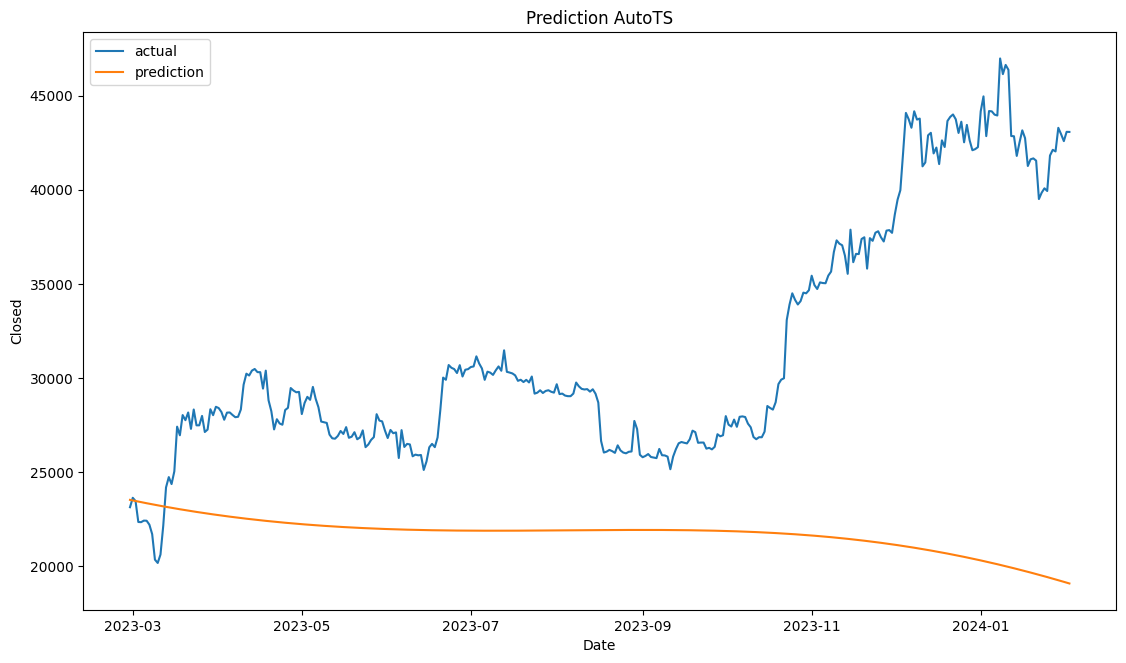

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], prediction.forecast[target_column], label="prediction")
ax.set_title("Prediction AutoTS")
ax.set_ylabel("Closed")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [9]:
non_zero = []
import sys
 
for i in prediction.forecast[target_column]:
    if i == 0:
        non_zero.append(i+sys.float_info.min)
    else:
        non_zero.append(i)
print_evaluation_metrics(non_zero, test[target_column], train[target_column])

Evaluation Metrics:
MSE: 144995363.79
RMSE: 12041.40
MAE: 9820.41
MAPE: 28.40
SMAPE: 34.78
MASE: 27.26


In [10]:
store_model(model, "automl")

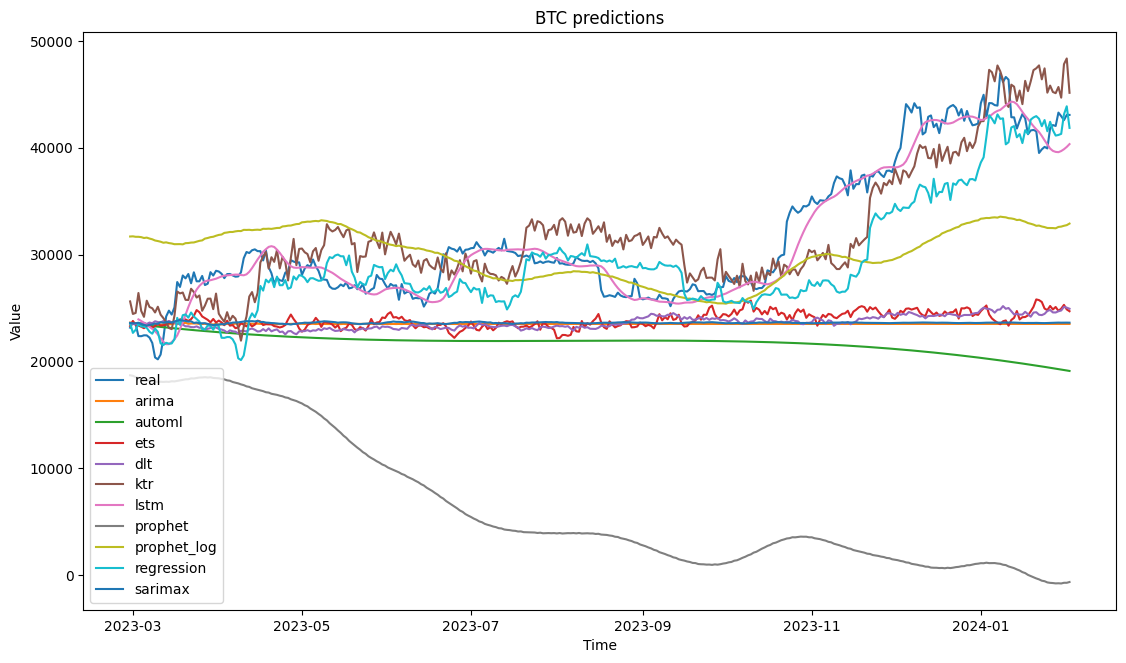

In [13]:
store_predictions_and_create_graph("automl", dates[int(data_length*train_split):], non_zero, test[target_column], "BTC")